# Personal Information
Name: **Zefan ZHU**

StudentID: **14930595**

Email: [**zefan.zhu@student.uva.nl**](youremail@student.uva.nl)

Submitted on: **22.03.2024**

# Data Context

Diabetes 130-US Hospitals for Years 1999-2008-The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. 

# Data Description

It includes 50 features representing patient and hospital outcomes.

Information was extracted from the database for encounters that satisfied the following criteria.

(1)	It is an inpatient encounter (a hospital admission).

(2)	It is a diabetic encounter, that is, one during which any kind of diabetes was entered into the system as a diagnosis.

(3)	The length of stay was at least 1 day and at most 14 days.

(4)	Laboratory tests were performed during the encounter.

(5)	Medications were administered during the encounter.


Table 1: List of features and their descriptions in the initial dataset (the dataset is also available at the website of Data Mining and Biomedical Informatics Lab at VCU (http://www.cioslab.vcu.edu/)).

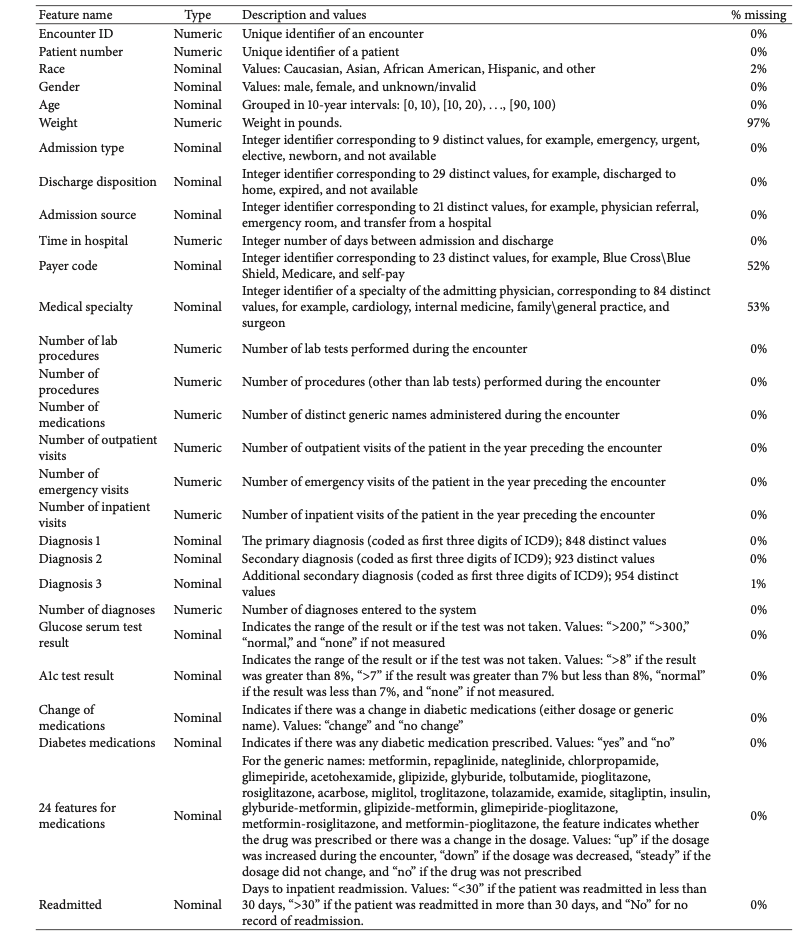




In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  






### Data Loading

In [2]:
# Load your data here
df=pd.read_csv("diabetic_data.csv")
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [3]:
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
print(df.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


# Processing with Missing Values

In [6]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))


encounter_id : [  2278392    149190     64410 ... 443854148 443857166 443867222]
patient_nbr : [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
race : ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender : ['Female' 'Male' 'Unknown/Invalid']
age : ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight : ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id : [6 1 2 3 4 5 8 7]
discharge_disposition_id : [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id : [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital : [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code : ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty : ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surg

In [7]:
#There are null values in our dataset in form of ‘?’and 'Unknown/Invalid', etc  replace them into np.nan form.
for col in df.columns:
    df[col].replace({'?': np.nan, 'Unknown/Invalid': np.nan}, inplace=True)




In [8]:
#check msiing value once again after transformation
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          3
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

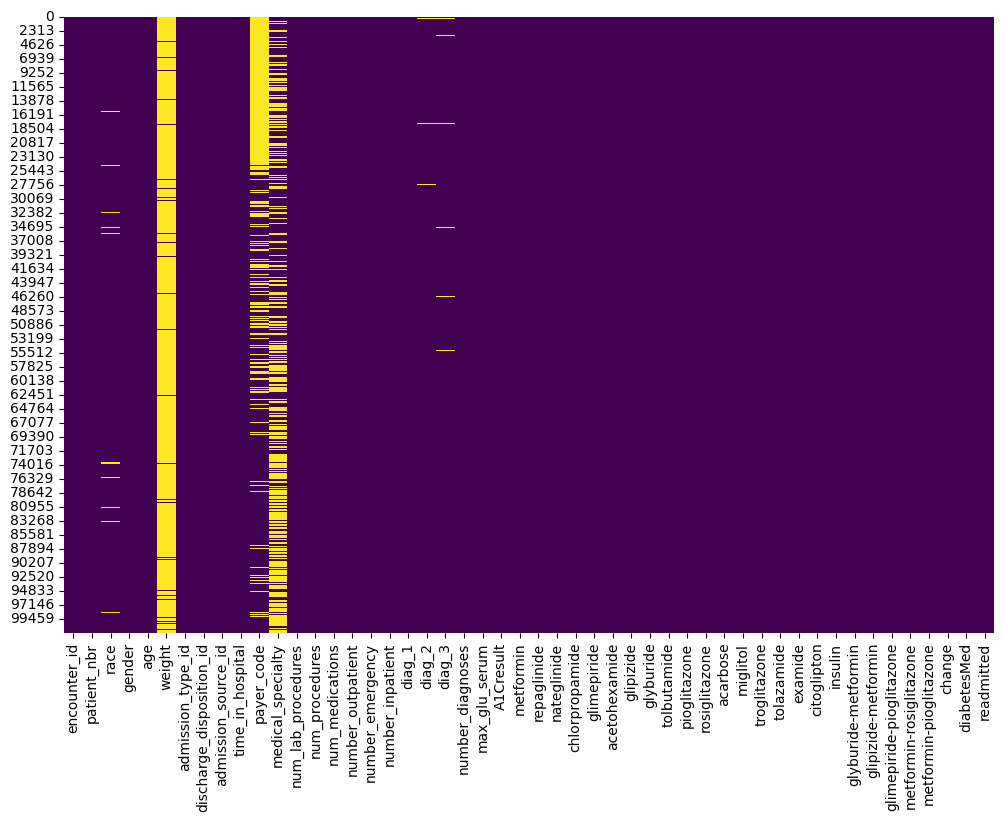

Proportion of missing values for columns with at least one missing value:
race                  2.233555
gender                0.002948
weight               96.858479
payer_code           39.557416
medical_specialty    49.082208
diag_1                0.020636
diag_2                0.351787
diag_3                1.398306
dtype: float64


In [9]:
#Visulising missingness of the dataset 
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels='auto')
plt.show()

#Calculate the proportion of missing values for columns that have at least one missing value
missing_proportions = df.loc[:, df.isnull().any()].isnull().mean() * 100
print("Proportion of missing values for columns with at least one missing value:")
print(missing_proportions)

## Removing  payer_code medical_specialty


## Fill the 'diag_1', 'diag_2', 'diag_3'

In [10]:
#f As the mssing value.

columns_to_fill = ['diag_1', 'diag_2', 'diag_3']

# Create a dictionary to hold the most common value for each column
most_common_values = {}

for column in columns_to_fill:
    # Find the most common value (mode) for the current column
    most_common_value = df[column].mode()[0]
    
    # Store the most common value in the dictionary
    most_common_values[column] = most_common_value
    
    # Fill missing values in the column with the most common value
    df[column].fillna(value=most_common_value, inplace=True)


## Dropout 'Gender' and fill the 'race'

In [11]:
#dropout the rows which has missing value in gender
df.dropna(subset=['gender'], inplace=True)


In [12]:
# Fill NaN values in race with 'Other'
df['race'] = df['race'].fillna('Other')

In [13]:
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

encounter_id : [  2278392    149190     64410 ... 443854148 443857166 443867222]
patient_nbr : [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
race : ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
gender : ['Female' 'Male']
age : ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight : [nan '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id : [6 1 2 3 4 5 8 7]
discharge_disposition_id : [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id : [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital : [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code : [nan 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty : ['Pediatrics-Endocrinology' nan 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthoped

## Checking the missing values again

In [14]:
# check the proportion of missing values in each column once again
missing_value_proportion = df.isnull().mean()

# Filter out columns that do not have any missing values
missing_value_proportion = missing_value_proportion[missing_value_proportion > 0]

# Print the proportion of missing values for columns with missing values
print(missing_value_proportion)





weight               0.968584
payer_code           0.395576
medical_specialty    0.490817
dtype: float64


According to the introfuctory paper, Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Record. By Beata Strack, Jonathan DeShazo, Chris Gennings, Juan Olmo, Sebastian Ventura, Krzysztof Cios, John Clore. 2014. Published in BioMed Research International, vol. 2014

Large percentage of missing values of the weight attribute can be explained by the fact that prior to the HITECH legislation of the American Reinvestment and Recovery Act in 2009 hospitals and clinics were not required to capture it in a structured format

# Categorize the Data

## We categorize the data into 4 types:
    C1(Metadata):
    C2(Personal unchangeable data):
    C3(Personal changeable data):
    C4(Biomarker):

C1: encounter_id, patient_nbr

C2:race,gender,age

C3: weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency,number_inpatient,number_diagnoses；
'diag_1', 'diag_2', 'diag_3'；
'metformin', 'repaglinide', 'nateglinide','chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide','glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton','insulin', 'glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone'；
'change', 'diabetesMed',readmitted

C4: 'max_glu_serum', 'A1Cresult'

# 1.1 Data Visualization and feature enginnering

## 1.1.1 Democraphic Data under C2

In [15]:
# Calculate counts for each category, including missing values

def print_counts_and_proportions(series, title):
    # Calculate proportions
    proportions = series / series.sum() * 100  # Convert to percentages

    # Combine counts and proportions into a DataFrame for easy display
    summary_df = pd.DataFrame({
        'Counts': series,
        'Proportions (%)': proportions.round(2)  # Round percentages to 2 decimal places
    })

    # Header
    print(f"{title} Distribution:")
    # Data
    print(summary_df.to_string())
    # Footer for separation
    print("\n" + "-" * 50 + "\n")
    
    
gender_counts = df['gender'].value_counts(dropna=False)  # Include missing values
race_counts = df['race'].value_counts(dropna=False)  # Include missing values
age_counts = df['age'].value_counts(dropna=False)  # Include missing values




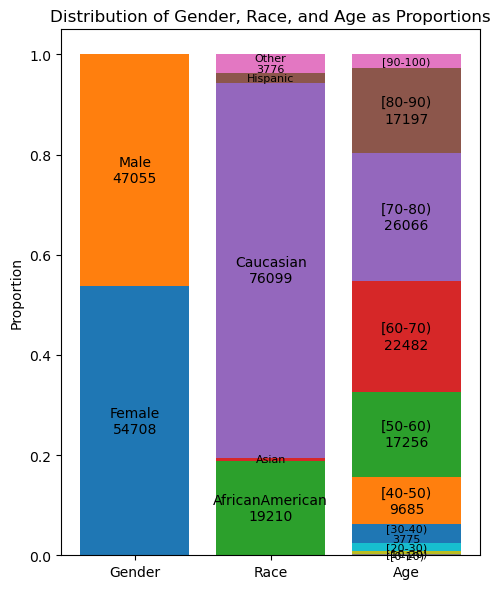

Gender Distribution:
        Counts  Proportions (%)
Female   54708            53.76
Male     47055            46.24

--------------------------------------------------

Race Distribution:
                 Counts  Proportions (%)
AfricanAmerican   19210            18.88
Asian               641             0.63
Caucasian         76099            74.78
Hispanic           2037             2.00
Other              3776             3.71

--------------------------------------------------

Age Distribution:
          Counts  Proportions (%)
[0-10)       161             0.16
[10-20)      691             0.68
[20-30)     1657             1.63
[30-40)     3775             3.71
[40-50)     9685             9.52
[50-60)    17256            16.96
[60-70)    22482            22.09
[70-80)    26066            25.61
[80-90)    17197            16.90
[90-100)    2793             2.74

--------------------------------------------------



In [16]:

# Calculate counts for each category, including missing values
gender_counts = df['gender'].value_counts(dropna=False).sort_index()
race_counts = df['race'].value_counts(dropna=False).sort_index()
age_counts = df['age'].value_counts(dropna=False).sort_index()

# Setup the matplotlib figure for proportion visualization
fig, ax = plt.subplots(figsize=(5, 6))  # Increased figure size for better readability

# Function to add text within or beside the bar
def add_bar_text(ax, base, proportion, label, count, idx, total):
    y_pos = base + proportion / 2  # Middle of the segment
    fontsize = 10 if proportion > 0.05 else 8  # Adjust fontsize based on proportion
    text = f'{label}\n{count}'
    # For very small segments, adjust text placement or skip
    if proportion < 0.03:  # Threshold for too small to annotate
        if proportion > 0:  # If not zero, just annotate label without count
            text = f'{label}'
        else:  # If too small, consider not annotating or use a different approach
            text = ''
    ax.text(idx, y_pos, text, ha='center', va='center', fontsize=fontsize, color='black')

# Visualize the proportions with adjusted text annotations
variables = ['Gender', 'Race', 'Age']
counts_list = [gender_counts, race_counts, age_counts]

for idx, (variable, counts) in enumerate(zip(variables, counts_list)):
    total = counts.sum()
    proportions = counts / total
    bottom = 0
    for label, count in counts.iteritems():
        proportion = count / total
        label_text = f'{label}' if pd.notnull(label) else 'NaN'
        # Adjust bar width and color as necessary
        bar = ax.bar(idx, proportion, bottom=bottom, label=label_text)
        add_bar_text(ax, bottom, proportion, label_text, count, idx, total)
        bottom += proportion

ax.set_xticks(range(len(variables)))
ax.set_xticklabels(variables)
ax.set_ylabel('Proportion')
ax.set_title('Distribution of Gender, Race, and Age as Proportions')


plt.tight_layout()
plt.show()

# Example usage with your series
print_counts_and_proportions(gender_counts, "Gender")
print_counts_and_proportions(race_counts, "Race")
print_counts_and_proportions(age_counts, "Age")


## 1.1.2 Data under C3

#### Categorical data: weight, admission_type_id,discharge_disposition_id,admission_source_id,'diag_1', 'diag_2', 'diag_3','metformin', 'repaglinide', 'nateglinide','chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide','glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton','insulin', 'glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone'； 'change', 'diabetesMed',readmitted


#### Numerical data: time_in_hospital,num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency,number_inpatient,number_diagnoses

### Categorical data

##### weight

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64


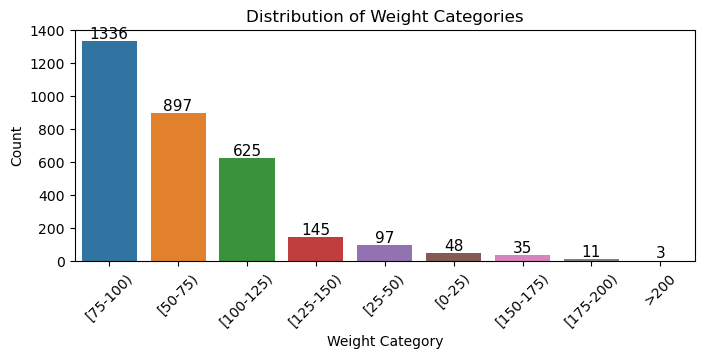

In [17]:
weight_counts = df['weight'].value_counts()
print(weight_counts)



# Plotting the distribution of categories in 'weight' column
plt.figure(figsize=(8, 3))
ax = sns.countplot(x='weight', data=df, order=df['weight'].value_counts().index)

plt.title('Distribution of Weight Categories')
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels to avoid overlap

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()



#### admission_type_counts, discharge_disposition_counts, and admission_source_counts


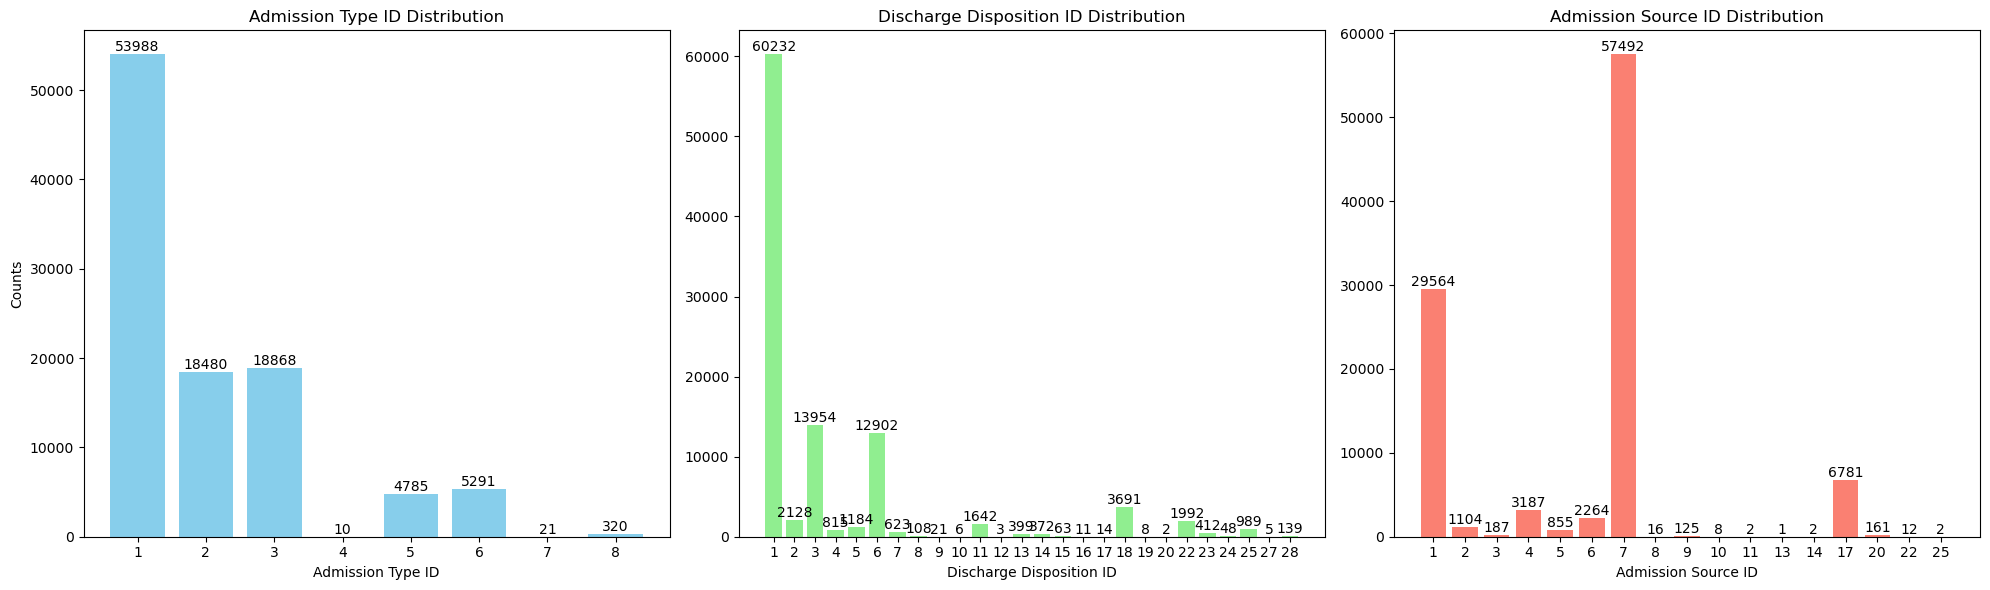

In [18]:

# Visualise the data of admission_type_counts, discharge_disposition_counts, and admission_source_counts

# Setup the matplotlib figure and axes
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Define a function to add labels on top of each bar
def add_labels(ax, series):
    for index, value in enumerate(series):
        ax.text(index, value, str(value), ha='center', va='bottom')

        
admission_type_counts = df['admission_type_id'].value_counts().sort_index()
discharge_disposition_counts = df['discharge_disposition_id'].value_counts().sort_index()
admission_source_counts = df['admission_source_id'].value_counts().sort_index()

# Plotting with count numbers
axs[0].bar(admission_type_counts.index.astype(str), admission_type_counts.values, color='skyblue')
add_labels(axs[0], admission_type_counts)
axs[0].set_title('Admission Type ID Distribution')
axs[0].set_xlabel('Admission Type ID')
axs[0].set_ylabel('Counts')

axs[1].bar(discharge_disposition_counts.index.astype(str), discharge_disposition_counts.values, color='lightgreen')
add_labels(axs[1], discharge_disposition_counts)
axs[1].set_title('Discharge Disposition ID Distribution')
axs[1].set_xlabel('Discharge Disposition ID')

axs[2].bar(admission_source_counts.index.astype(str), admission_source_counts.values, color='salmon')
add_labels(axs[2], admission_source_counts)
axs[2].set_title('Admission Source ID Distribution')
axs[2].set_xlabel('Admission Source ID')

# Adjust layout for better visual presentation
plt.tight_layout()

plt.show()




#### Reduce the level of those categorical variables

##### admission_type_id

1 (Known type)= [1, 2, 3, 4, 7]

0 (Unknown type)


In [19]:
#"admission_type_id" can be  factored  from 8  levels to 2 levels according to the IDS_mapping.csv
df['admission_type_id'] = df['admission_type_id'].apply(lambda x: 1 if x in [1, 2, 3, 4, 7] else 0)


##### admission_source_id

Similarly Admission Source ID are converted into small number of categories

Referral = [1, 2, 3]

Transfer = [4, 5, 6, 10, 22, 25, 26]

Unknown = [9, 17, 20]

Baby = [11, 13, 14,17]

Other= [7, 8]

In [20]:

# Define a function to map admission_source_id to the new categories
def map_admission_source(admission_source_id):
    if admission_source_id in [1, 2, 3]:
        return 'Referral'
    elif admission_source_id in [4, 5, 6, 10, 22, 25, 26]:
        return 'Transfer'
    elif admission_source_id in [9, 17, 20]:
        return 'Unknown'
    elif admission_source_id in [11, 13, 14, 17]:
        return 'Baby'
    elif admission_source_id in [7, 8]:
        return 'Other'
    else:
        return 'Other'  # Default category for any id not listed

# Apply the mapping function to the admission_source_id column
df['admission_source_id'] = df['admission_source_id'].apply(map_admission_source)



##### discharge_disposition_id


Using domain knowledge to convert them distict values into small number of categories.

Discharge Disposition ID corresponding to [11 or 13 or 14 or 19 or 20 or 21] indicates patient has expired so there is no chance that it will readmit again so we will remove these records.

Discharge Disposition ID has lots of distinct values using domain knowledge we will convert them into small number of categories.

home = [1, 6, 8, 9, 13]

facility = [2, 3, 4, 5, 14, 22, 23, 24]

discharge = [10, 12, 15, 16, 17]

expired = [11, 19, 20, 21]

Unknown = [18, 25, 26]

In [21]:

# Define a function to map discharge_disposition_id to the new categories
def map_discharge_disposition(discharge_disposition_id):
    if discharge_disposition_id in [1, 6, 8, 9, 13]:
        return 'Home'
    elif discharge_disposition_id in [2, 3, 4, 5, 14, 22, 23, 24]:
        return 'Facility'
    elif discharge_disposition_id in [10, 12, 15, 16, 17]:
        return 'Discharge'
    elif discharge_disposition_id in [11, 19, 20, 21]:
        return 'Expired'
    elif discharge_disposition_id in [18, 25, 26]:
        return 'Unknown'
    else:
        return 'Other'  # Default category for any id not listed

# Apply the mapping function to the discharge_disposition_id column
df['discharge_disposition_id'] = df['discharge_disposition_id'].apply(map_discharge_disposition)




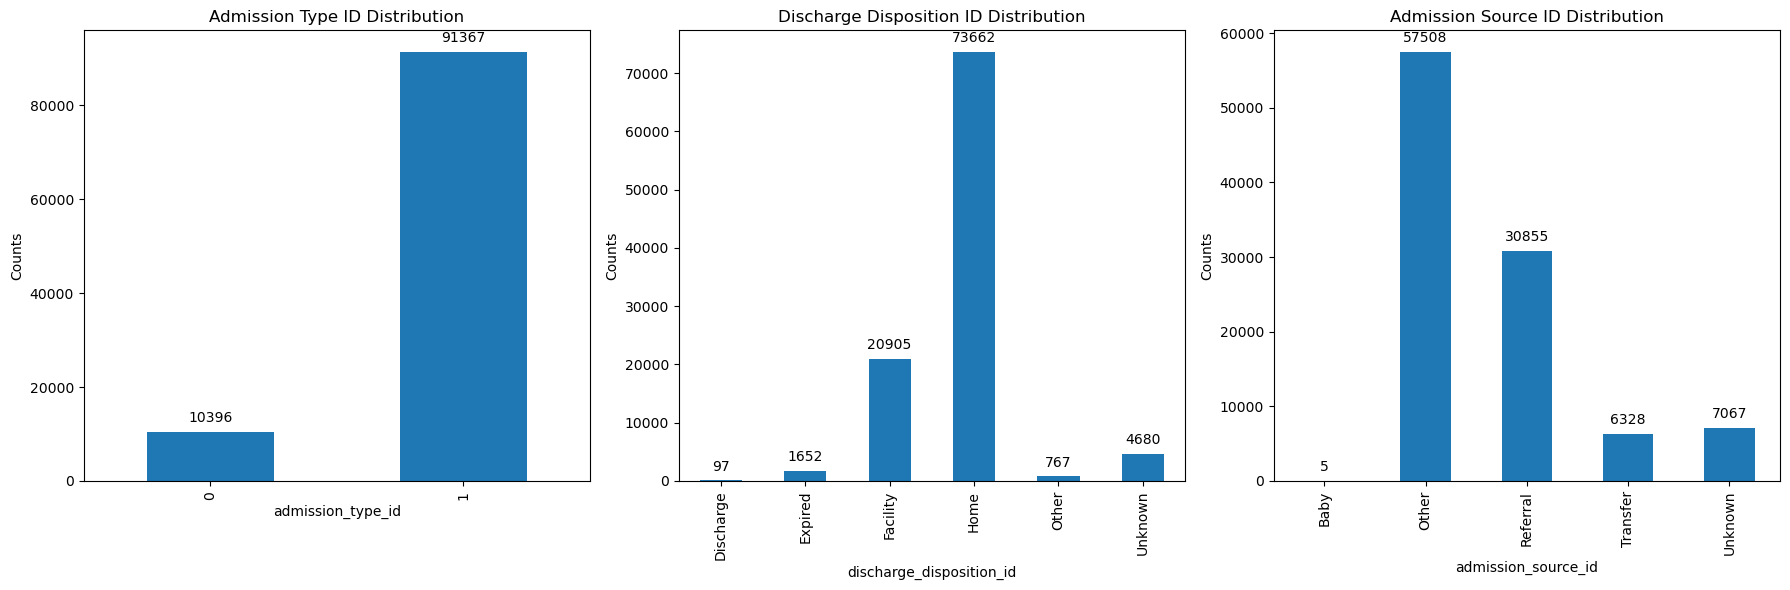

In [22]:

# Setup the matplotlib figure and axes for the bar charts
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Titles for each subplot
titles = ['Admission Type ID Distribution', 'Discharge Disposition ID Distribution', 'Admission Source ID Distribution']
# Variables to plot
variables_to_plot = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

for ax, variable, title in zip(axs, variables_to_plot, titles):
    # Calculate counts for the current variable
    counts = df[variable].value_counts().sort_index()
    # Plot the bar chart
    counts.plot(kind='bar', ax=ax)
    ax.set_title(title)
    ax.set_xlabel(variable)
    ax.set_ylabel('Counts')
    
    # Add count annotations to each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout for better visual presentation
plt.tight_layout()
plt.show()



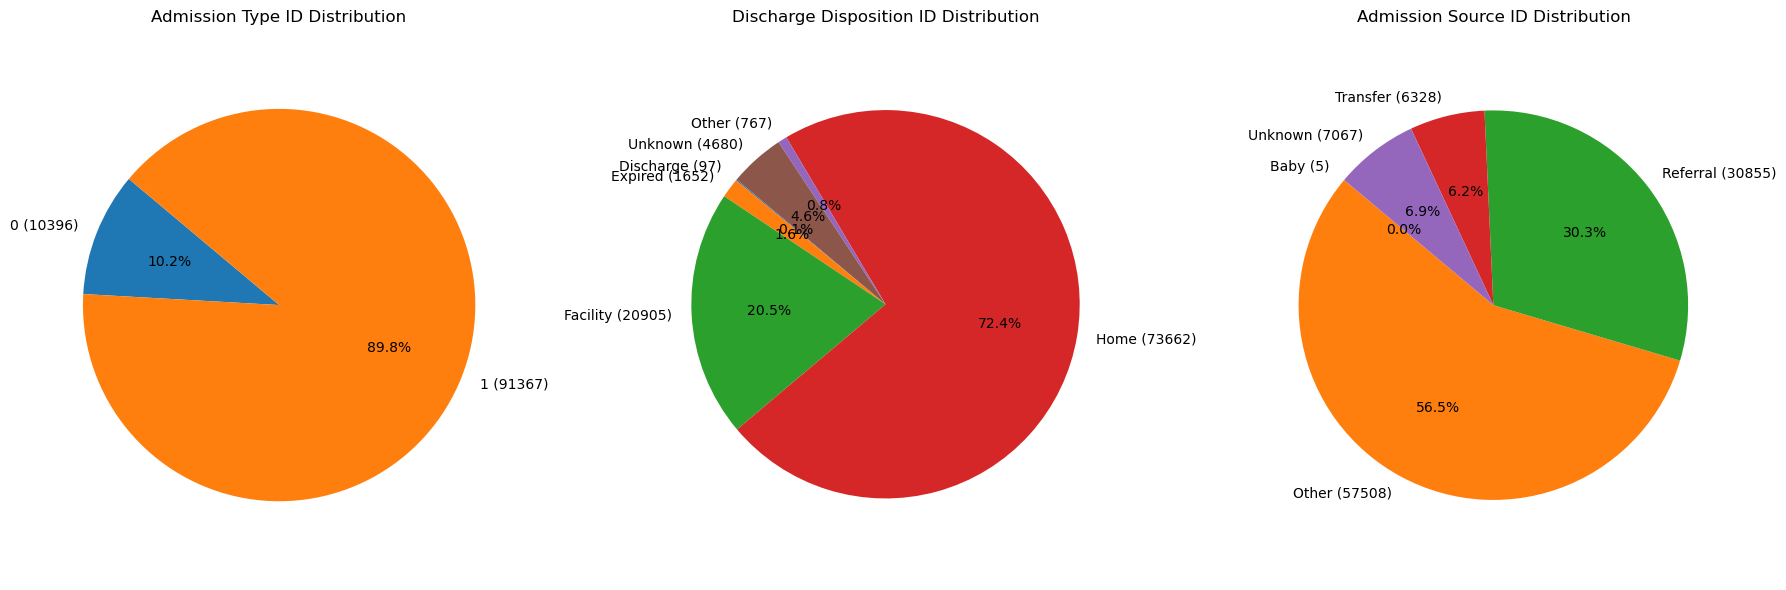

In [23]:
# Setup the matplotlib figure for the pie charts
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Titles for each subplot
titles = ['Admission Type ID Distribution', 'Discharge Disposition ID Distribution', 'Admission Source ID Distribution']
# Variables to plot
variables_to_plot = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

for ax, variable, title in zip(axs, variables_to_plot, titles):
    # Calculate counts for the current variable
    counts = df[variable].value_counts().sort_index()
    # Generate labels for the pie chart, including the count
    labels = [f'{index} ({count})' for index, count in counts.items()]
    # Plot the pie chart
    ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(title)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout for better visual presentation
plt.tight_layout()
plt.show()



##### The diag_1 , diag_2 , diag_3 have lots unique values 
##### Using the domain knowledge based on the ICD9 to create fewer values.

In [24]:
# Function to categorize diagnosis codes
def categorize_diagnosis(diagnosis):
    if str(diagnosis).startswith(('V', 'E')):
        return 'other'
    diagnosis = float(diagnosis)
    if 390 <= diagnosis < 460 or diagnosis == 785:
        return 'circulatory'
    elif 460 <= diagnosis < 520 or diagnosis == 786:
        return 'respiratory'
    elif 520 <= diagnosis < 580 or diagnosis == 787:
        return 'digestive'
    elif diagnosis == 250:
        return 'diabetes'
    elif 800 <= diagnosis < 1000:
        return 'injury'
    elif 710 <= diagnosis < 740:
        return 'musculoskeletal'
    elif 580 <= diagnosis < 630 or diagnosis == 788:
        return 'genitourinary'
    elif 140 <= diagnosis < 240:
        return 'neoplasms'
    elif 630 <= diagnosis < 680:
        return 'pregnancy'
    else:
        return 'other'

# Apply the categorization function to diagnosis columns
df['diag_1'] = df['diag_1'].apply(categorize_diagnosis)
df['diag_2'] = df['diag_2'].apply(categorize_diagnosis)
df['diag_3'] = df['diag_3'].apply(categorize_diagnosis)

# Display unique categories for each diagnosis column
print(np.unique(df['diag_1']), '\n')
print(np.unique(df['diag_2']), '\n')
print(np.unique(df['diag_3']), '\n')


['circulatory' 'diabetes' 'digestive' 'genitourinary' 'injury'
 'musculoskeletal' 'neoplasms' 'other' 'pregnancy' 'respiratory'] 

['circulatory' 'diabetes' 'digestive' 'genitourinary' 'injury'
 'musculoskeletal' 'neoplasms' 'other' 'pregnancy' 'respiratory'] 

['circulatory' 'diabetes' 'digestive' 'genitourinary' 'injury'
 'musculoskeletal' 'neoplasms' 'other' 'pregnancy' 'respiratory'] 



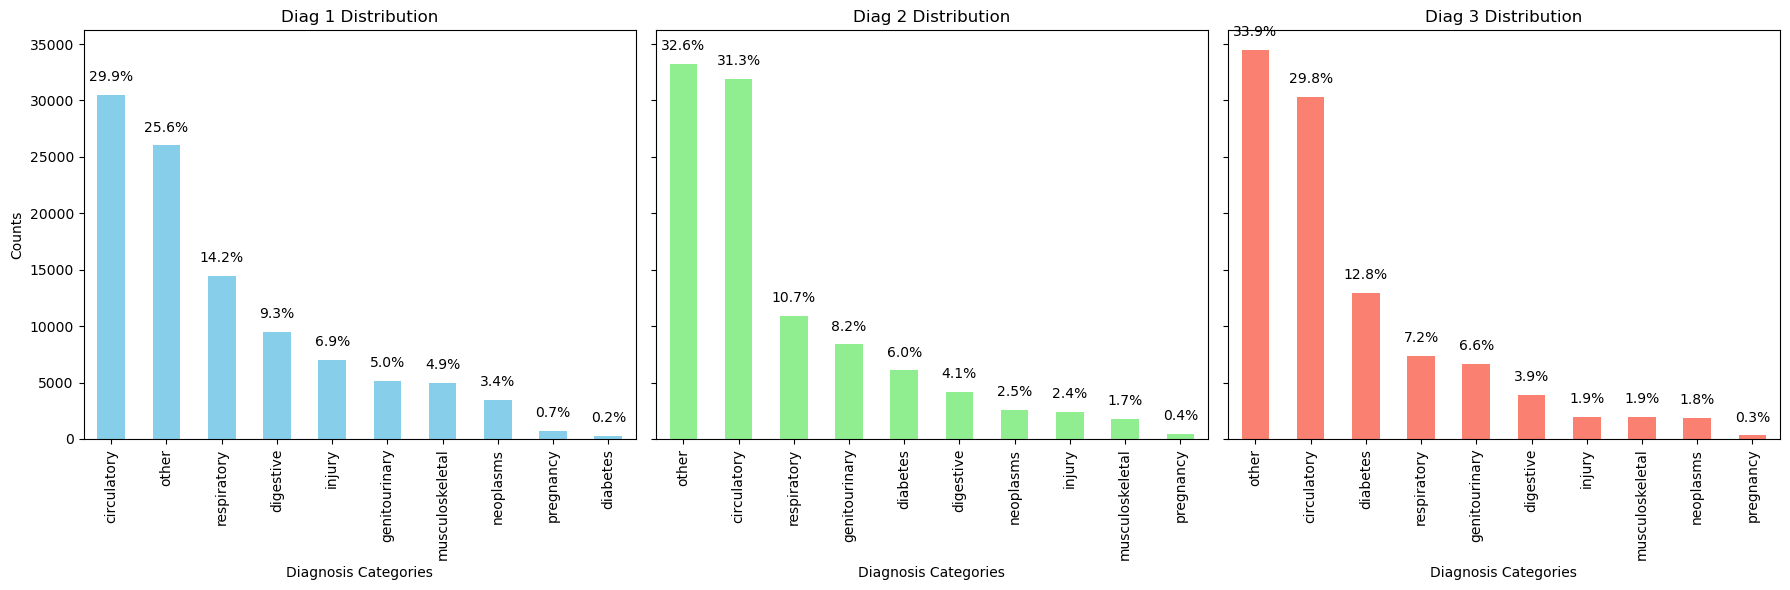

In [25]:



# Calculate the counts of each category for diag_1, diag_2, and diag_3
diag_1_counts = df['diag_1'].value_counts()
diag_2_counts = df['diag_2'].value_counts()
diag_3_counts = df['diag_3'].value_counts()

# Function to annotate bars with percentages
def annotate_bars(ax, counts):
    total = counts.sum()
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Setup the matplotlib figure and axes for the bar charts
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # sharey to have the same y-axis scale

# Plotting the distribution of diagnoses in diag_1 with percentages
diag_1_counts.plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Diag 1 Distribution')
axs[0].set_xlabel('Diagnosis Categories')
axs[0].set_ylabel('Counts')
annotate_bars(axs[0], diag_1_counts)

# Plotting the distribution of diagnoses in diag_2 with percentages
diag_2_counts.plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Diag 2 Distribution')
axs[1].set_xlabel('Diagnosis Categories')
annotate_bars(axs[1], diag_2_counts)

# Plotting the distribution of diagnoses in diag_3 with percentages
diag_3_counts.plot(kind='bar', ax=axs[2], color='salmon')
axs[2].set_title('Diag 3 Distribution')
axs[2].set_xlabel('Diagnosis Categories')
annotate_bars(axs[2], diag_3_counts)

# Adjust layout for better visual presentation
plt.tight_layout()
plt.show()




In [26]:
# Check if each diagnosis is 'diabetes', then sum up the True values across the columns
total_diabetes_count = (
    (df['diag_1'] == 'diabetes').sum() +
    (df['diag_2'] == 'diabetes').sum() +
    (df['diag_3'] == 'diabetes').sum()
)

print(f"Total count of 'diabetes' diagnoses across diag_1, diag_2, and diag_3: {total_diabetes_count}")

total_rows = df.shape[0]

print(f"Total number of rows in the DataFrame: {total_rows}")

rows_without_diabetes = df[~df.apply(lambda row: row.astype(str).str.contains('diabetes').any(), axis=1)]

rows_without_diabetes


Total count of 'diabetes' diagnoses across diag_1, diag_2, and diag_3: 19284
Total number of rows in the DataFrame: 101763


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,Home,Other,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,Home,Other,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
6,55842,84259809,Caucasian,Male,[60-70),NaN,1,Home,Referral,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
8,12522,48330783,Caucasian,Female,[80-90),NaN,1,Home,Transfer,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),NaN,1,Facility,Transfer,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,Facility,Other,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,Facility,Transfer,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,Home,Other,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,1,Facility,Other,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


### Numerical data

####  time_in_hospital,num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency,number_inpatient,number_diagnoses


In [27]:
import pandas as pd

# Assuming df is your DataFrame containing the relevant columns
# Replace df with your actual DataFrame

features = df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']].describe()

print(features)


       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
count     101763.000000       101763.000000   101763.000000    101763.000000   
mean           4.396018           43.095909        1.339691        16.021835   
std            2.985092           19.674220        1.705792         8.127589   
min            1.000000            1.000000        0.000000         1.000000   
25%            2.000000           31.000000        0.000000        10.000000   
50%            4.000000           44.000000        1.000000        15.000000   
75%            6.000000           57.000000        2.000000        20.000000   
max           14.000000          132.000000        6.000000        81.000000   

       number_outpatient  number_emergency  number_inpatient  number_diagnoses  
count      101763.000000     101763.000000     101763.000000     101763.000000  
mean            0.369368          0.197842          0.635585          7.422649  
std             1.267282          0.

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame containing the specified features
# Replace df with your actual DataFrame

# Select the features you want to center and normalize
features_to_normalize = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                         'num_medications', 'number_outpatient', 'number_emergency', 
                         'number_inpatient', 'number_diagnoses']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the selected features and transform the data
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

# Now df contains the centered and normalized values for the specified features



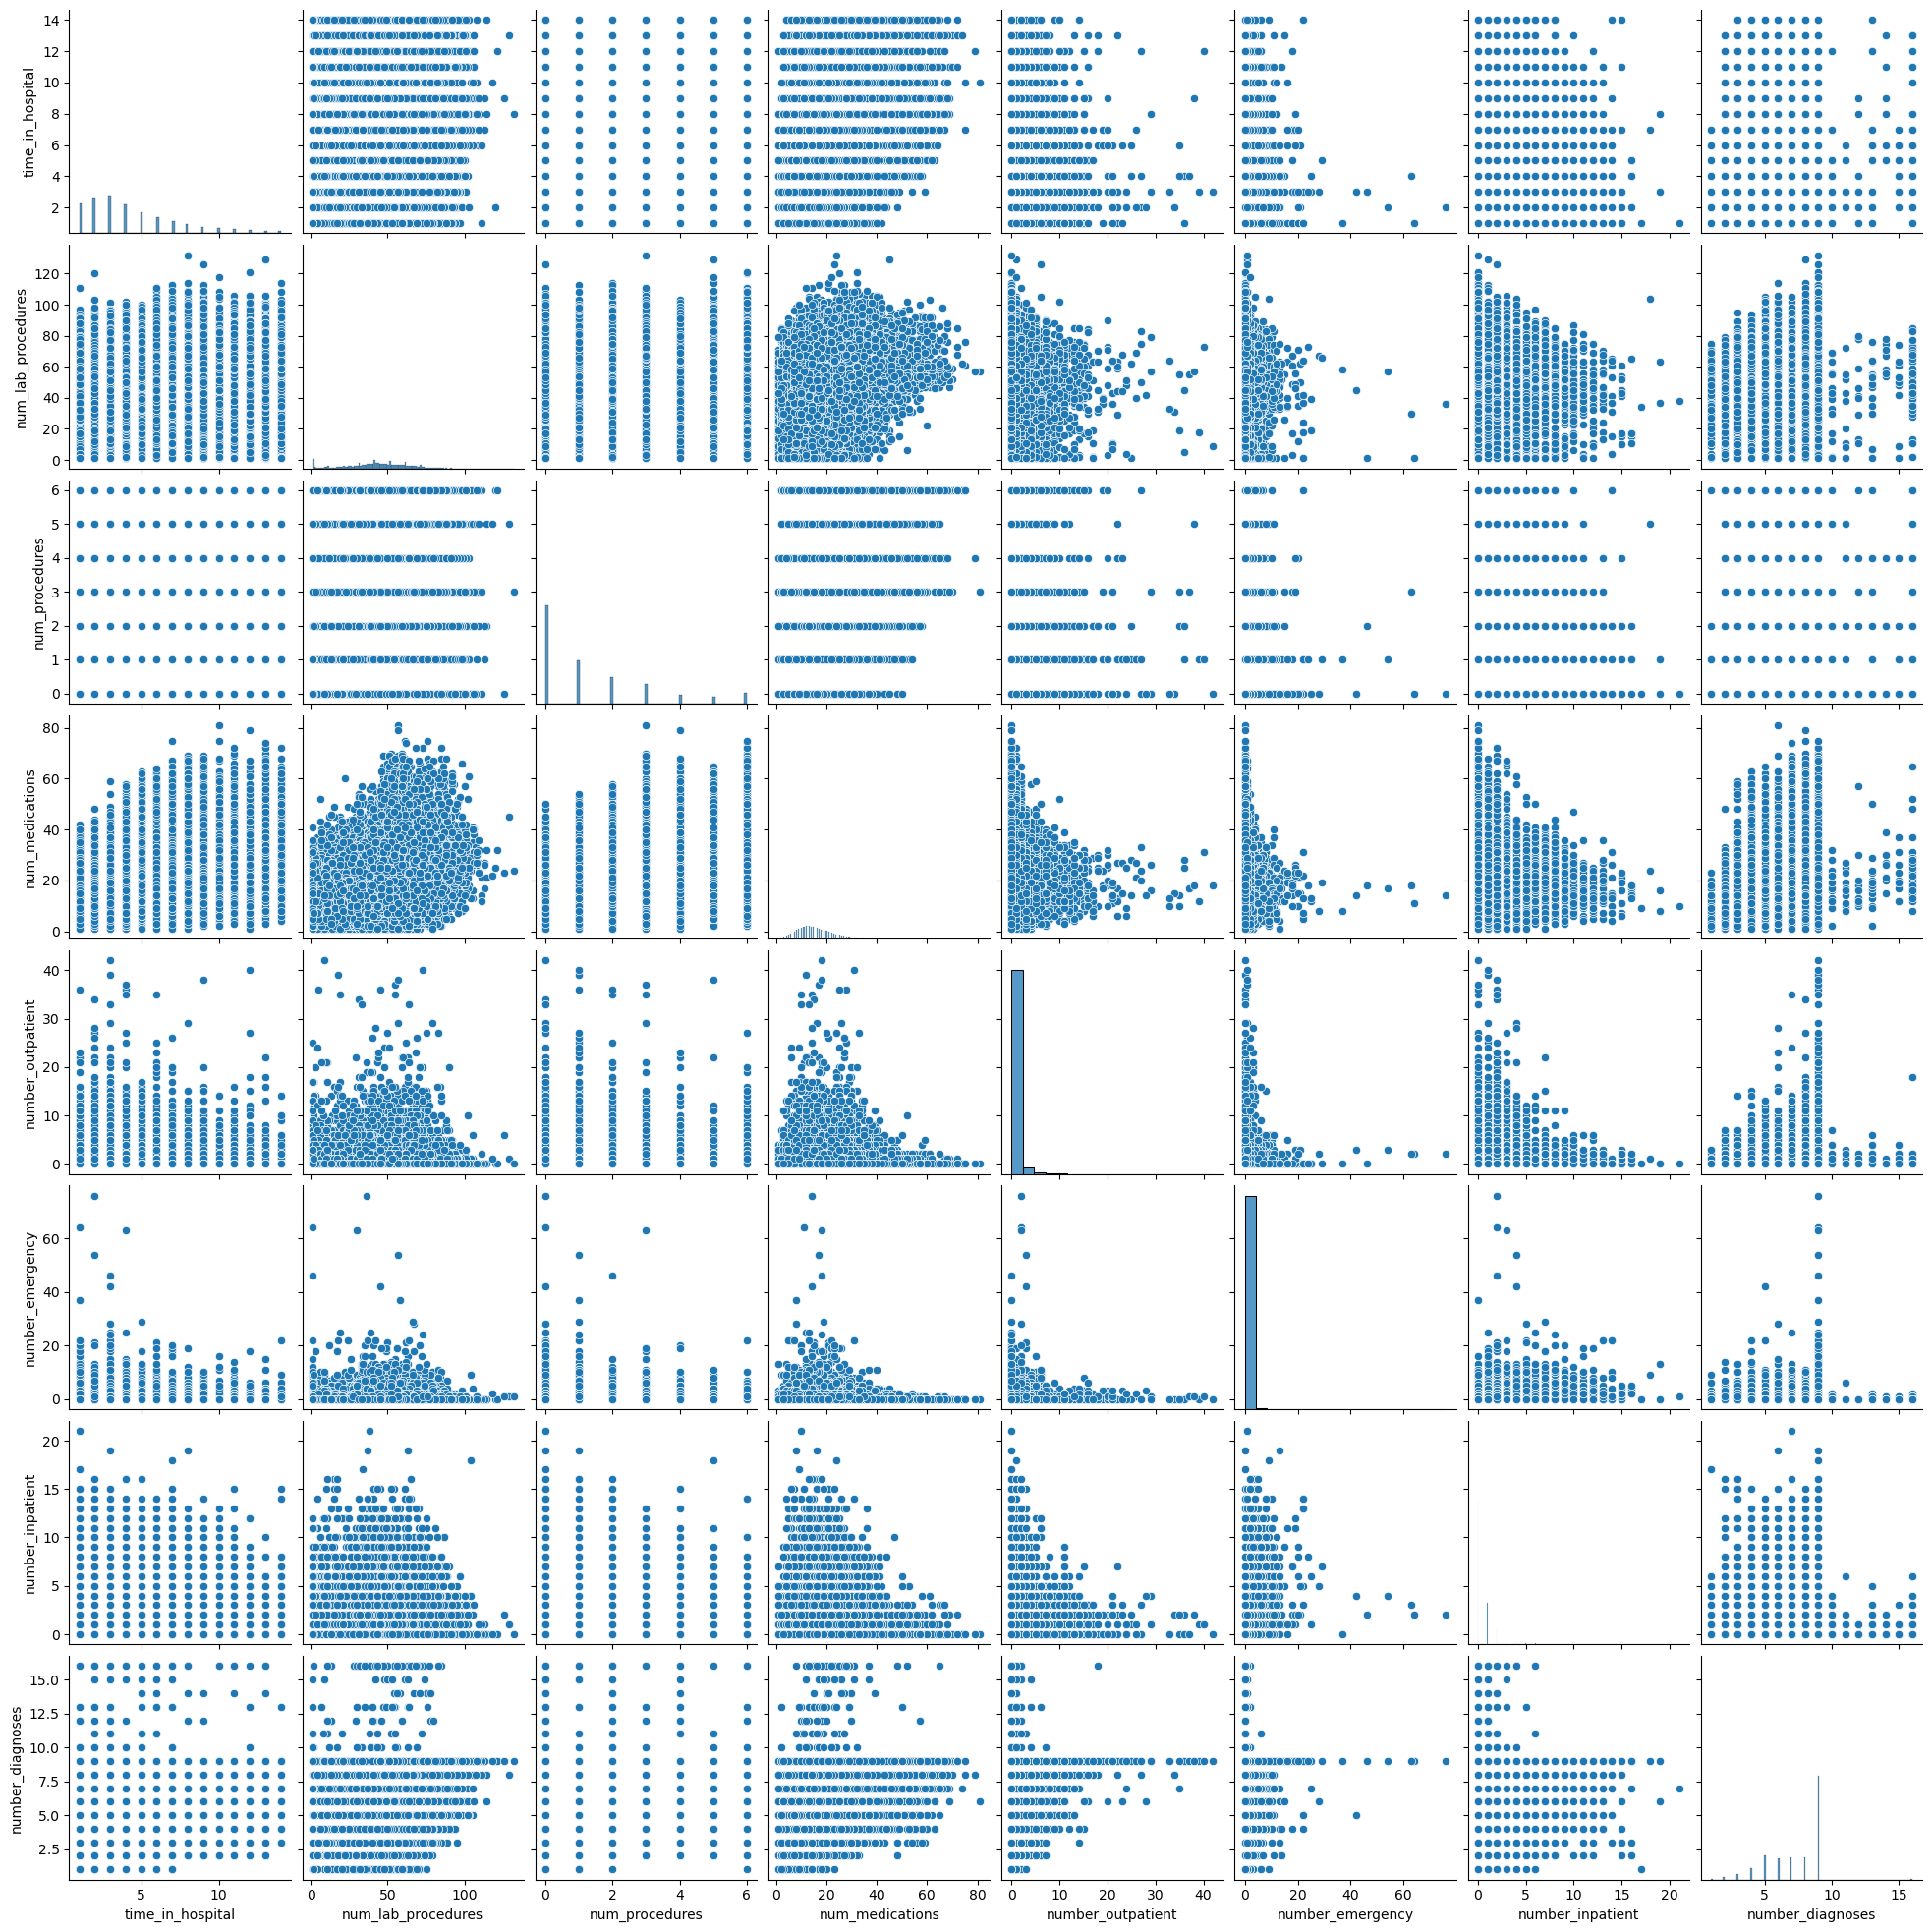

In [29]:
import seaborn as sns

# List of variables for the pair plot
features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                     'num_medications', 'number_outpatient', 'number_emergency', 
                     'number_inpatient', 'number_diagnoses']

# Creating a pair plot
sns.pairplot(df[features])

plt.show()


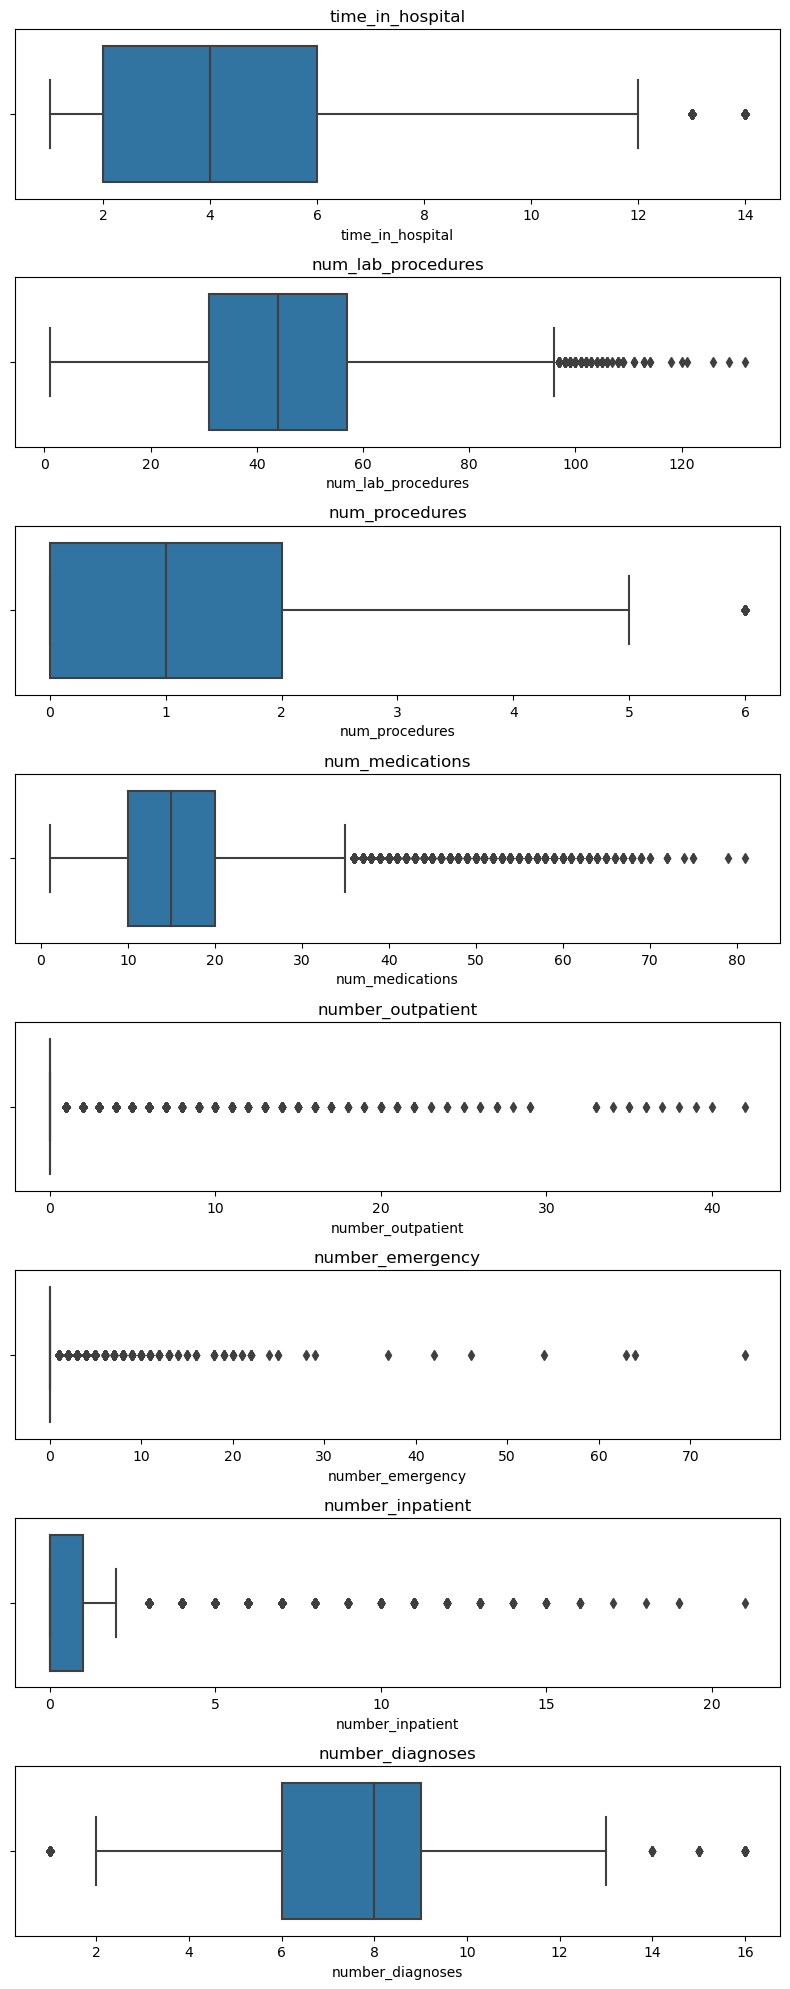

In [30]:
features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
             'num_medications', 'number_outpatient', 'number_emergency', 
             'number_inpatient', 'number_diagnoses']

fig, axs = plt.subplots(len(features), 1, figsize=(8, 20))

for i, var in enumerate(features):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()


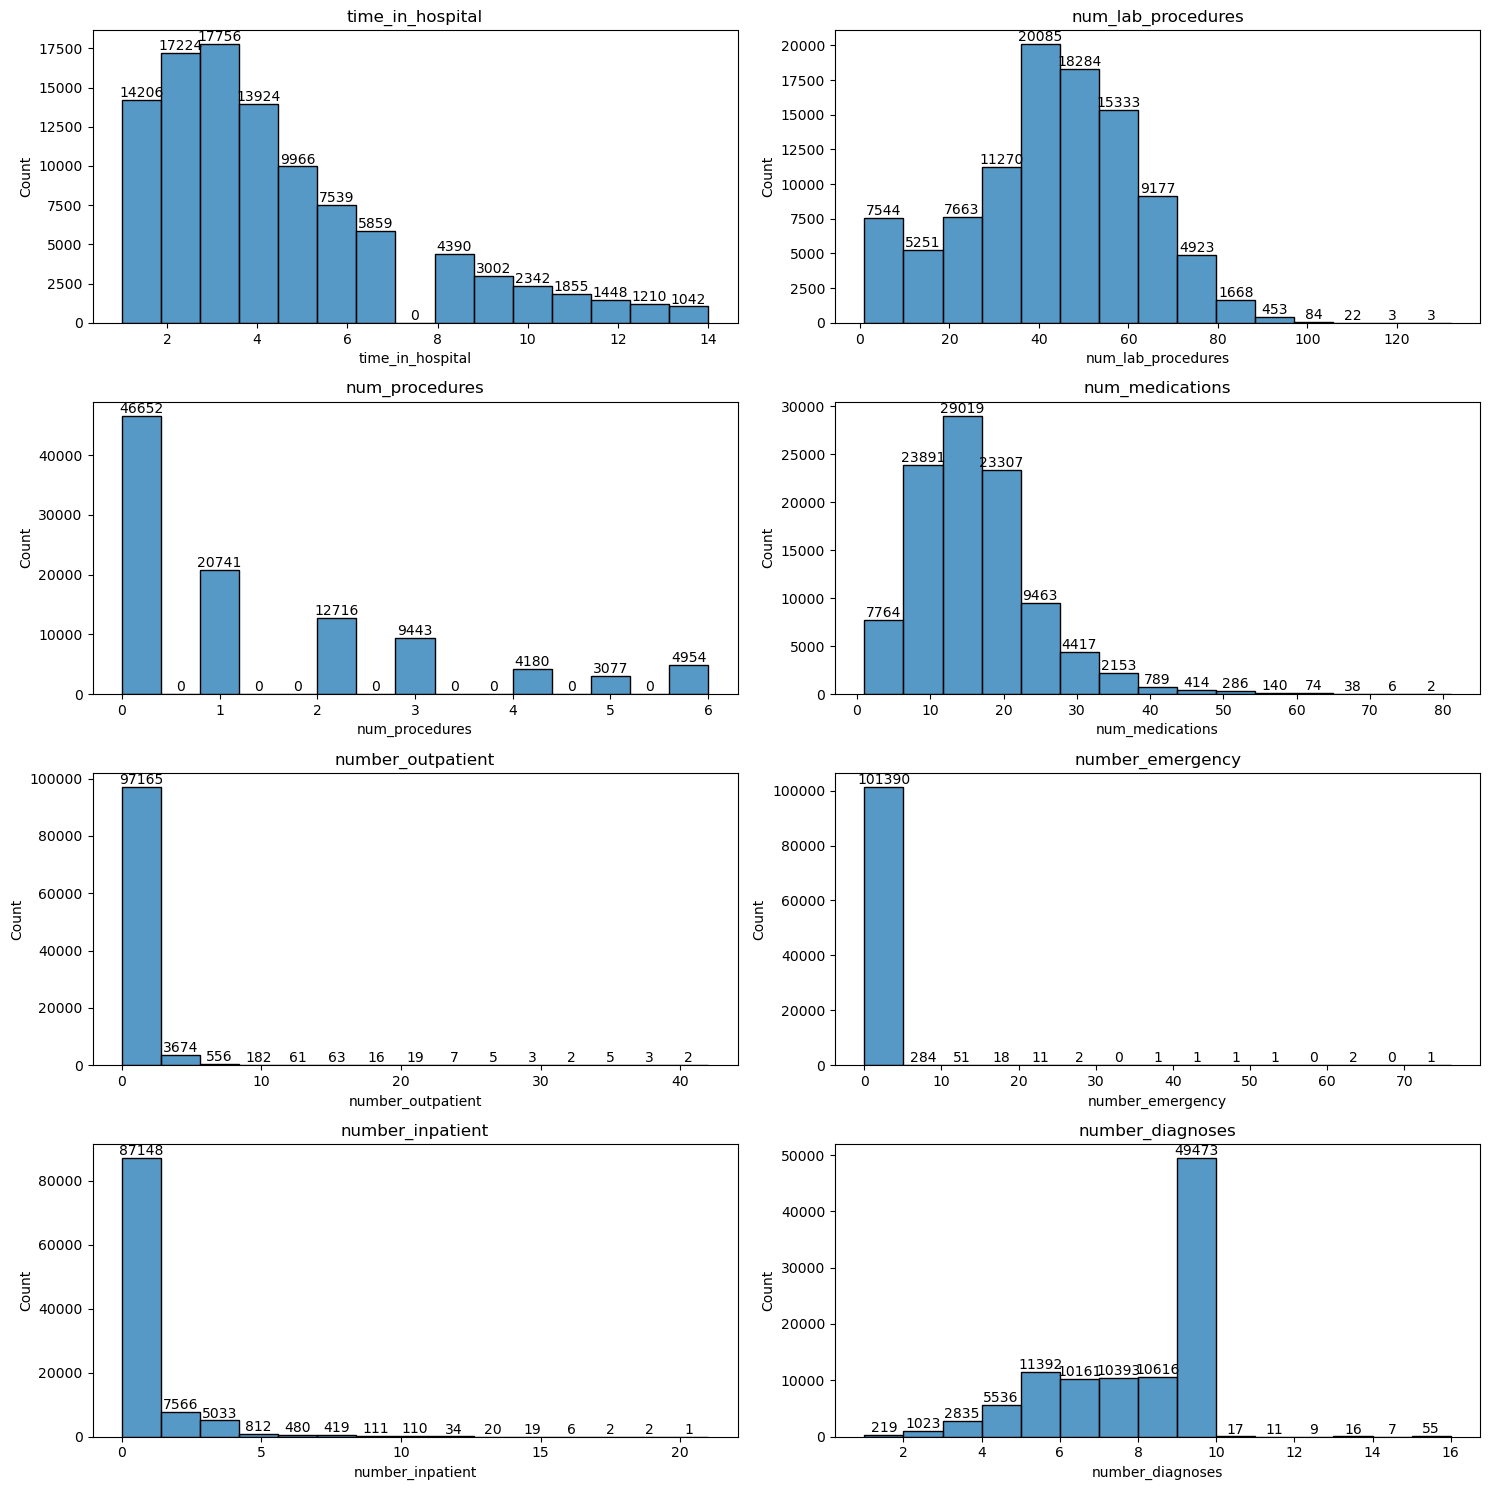

In [31]:


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

for i, feature in enumerate(features):
    ax = sns.histplot(data=df, x=feature, bins=15, kde=False, ax=axes[i])
    ax.set_title(feature)
    ax.set_ylabel('Count')
    # Annotate counts above bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        
plt.tight_layout()
plt.show()




Multicollinearity

Pairs with correlation coefficients above 0.4:
            Feature 1           Feature 2  Correlation Coefficient
1    time_in_hospital  num_lab_procedures                 0.318429
2    time_in_hospital     num_medications                 0.466137
3  num_lab_procedures    time_in_hospital                 0.318429
6      num_procedures     num_medications                 0.385761
7     num_medications    time_in_hospital                 0.466137
8     num_medications      num_procedures                 0.385761


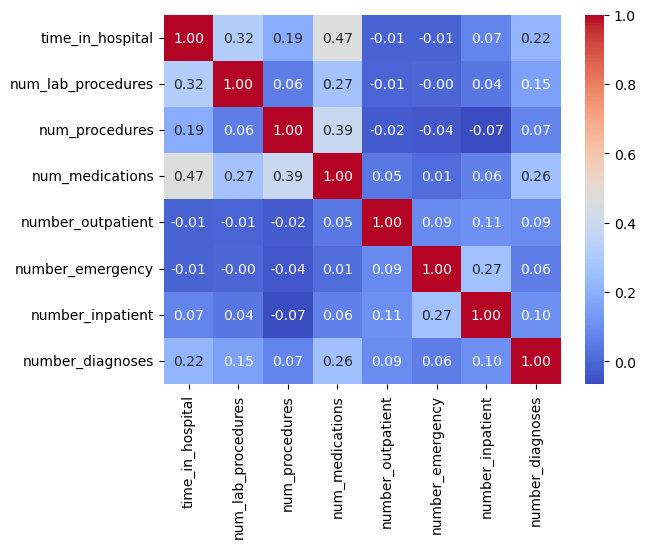

In [32]:
import pandas as pd
import seaborn as sns

# Assuming your DataFrame is named df
features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
            'num_medications', 'number_outpatient', 'number_emergency', 
            'number_inpatient', 'number_diagnoses']

# Selecting the features
df_features = df[features]

# Calculating the correlation matrix
correlation_matrix = df_features.corr()

# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Getting pairs with correlation coefficients above 0.4
correlation_threshold = 0.3
high_correlation_pairs = (correlation_matrix
                          .unstack()
                          .loc[lambda x: abs(x) > correlation_threshold]
                          .reset_index())
high_correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation Coefficient']
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs['Feature 1'] != high_correlation_pairs['Feature 2']]
print("Pairs with correlation coefficients above 0.4:")
print(high_correlation_pairs)



The corrplot reported the following pairs with the coefficient above 0.3 level.
    time_in_hospital     num_lab_procedures              0.318429
    time_in_hospital     num_medications                 0.466137
    num_procedures       num_medications                 0.385761


In [33]:
# Check the statistically significant association between each C4 variable (e.g., metformin, repaglinide, etc.) and the readmission status of patients

from scipy.stats import chi2_contingency
import pandas as pd

C4_vars = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
                    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
                    'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
                    'miglitol', 'troglitazone', 'tolazamide', 'examide', 
                    'citoglipton', 'insulin', 'glyburide-metformin', 
                    'glipizide-metformin', 'glimepiride-pioglitazone', 
                    'metformin-rosiglitazone', 'metformin-pioglitazone']

for var in C4_vars:
    contingency_table = pd.crosstab(df[var], df['readmitted'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    significance = "Significant" if p < 0.05 else "Not Significant"
    print(f"{var} - p-value: {p:.4f} ({significance})")



metformin - p-value: 0.0000 (Significant)
repaglinide - p-value: 0.0000 (Significant)
nateglinide - p-value: 0.7544 (Not Significant)
chlorpropamide - p-value: 0.1761 (Not Significant)
glimepiride - p-value: 0.0107 (Significant)
acetohexamide - p-value: 0.3940 (Not Significant)
glipizide - p-value: 0.0000 (Significant)
glyburide - p-value: 0.1246 (Not Significant)
tolbutamide - p-value: 0.4415 (Not Significant)
pioglitazone - p-value: 0.0000 (Significant)
rosiglitazone - p-value: 0.0000 (Significant)
acarbose - p-value: 0.0000 (Significant)
miglitol - p-value: 0.0717 (Not Significant)
troglitazone - p-value: 0.4878 (Not Significant)
tolazamide - p-value: 0.2785 (Not Significant)
examide - p-value: 1.0000 (Not Significant)
citoglipton - p-value: 1.0000 (Not Significant)
insulin - p-value: 0.0000 (Significant)
glyburide-metformin - p-value: 0.2022 (Not Significant)
glipizide-metformin - p-value: 0.3592 (Not Significant)
glimepiride-pioglitazone - p-value: 0.3940 (Not Significant)
metform

In [34]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,0,Unknown,Referral,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,Home,Other,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,Home,Other,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,Home,Other,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,Home,Other,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [36]:
csv_file_path = 'Experimentdf.csv'

# Export the DataFrame to CSV
df.to_csv(csv_file_path, index=False)

## Features kept for analysis

Original Features:

C1: encounter_id, patient_nbr

C2:race,gender,age

C3: weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency,number_inpatient,number_diagnoses,'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','change', 'diabetesMed',readmitted

C4: 'max_glu_serum', 'A1Cresult'




Features kept for analysis:

C2:race,gender,age

C3: weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency,number_inpatient,number_diagnoses,'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide', 'glipizide', 'pioglitazone', 'insulin','change', 'diabetesMed',readmitted

C4: 'max_glu_serum', 'A1Cresult'




In [85]:
# Create a new DataFrame with the specified columns
selected_columns = ['race', 'gender', 'age',
                    'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 
                    'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient',
                    'number_diagnoses', 'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide', 'glipizide', 'pioglitazone', 'insulin',
                    'change', 'diabetesMed', 'readmitted', 'max_glu_serum', 'A1Cresult']

# Create a new DataFrame with only the selected columns
selected_df = df[selected_columns]

# Export the DataFrame to a CSV file
selected_df.to_csv('selected_features.csv', index=False)


# 2. Correlation Analysis


## 2.1 Correlation Analysis between C2 and C3

 ### 2.1.1 Age At Primary Diagnosis 

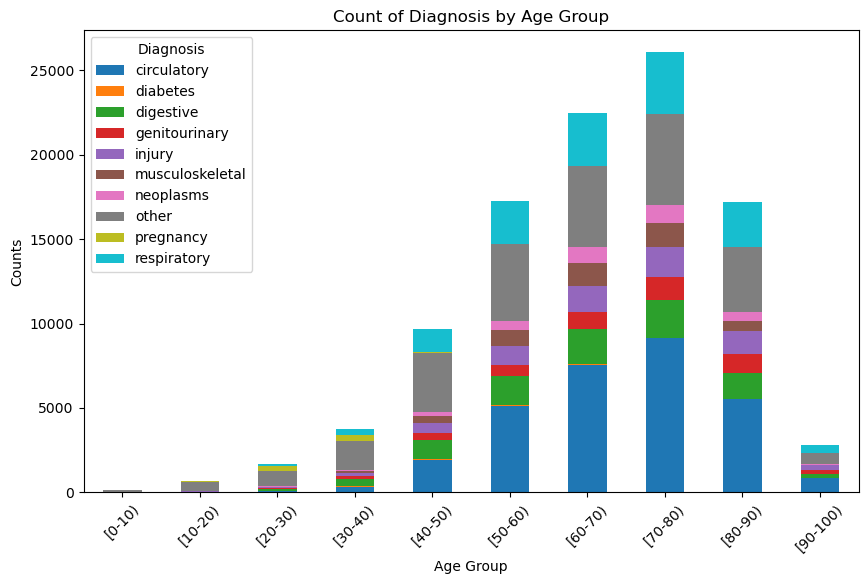

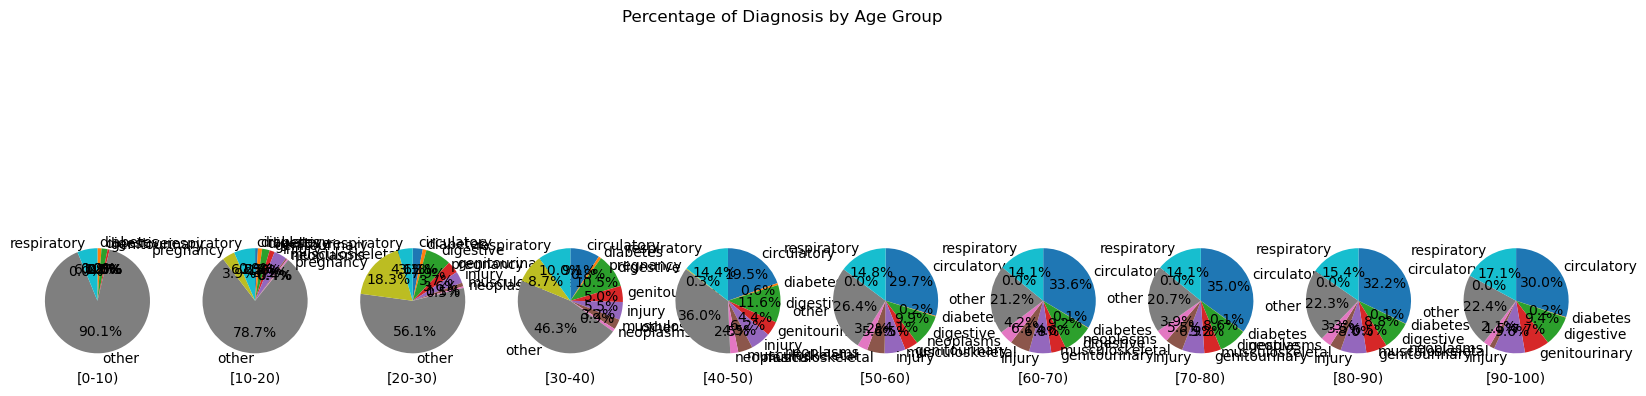

In [44]:
# Calculate counts and percentages
count_df = df.groupby(['age', 'diag_1']).size().unstack(fill_value=0)
percentage_df = (count_df.T / count_df.sum(axis=1)).T * 100  # Transpose before and after to calculate correct percentages

# Plotting the count data as a bar chart
count_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Diagnosis by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Diagnosis')
plt.show()

# Plotting the percentage data as a pie chart for each age group
fig, axes = plt.subplots(1, count_df.shape[0], figsize=(20, 6))  # Subplot for each age group
for i, (idx, row) in enumerate(percentage_df.iterrows()):
    ax = axes[i]
    row.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, counterclock=False, labels=row.index)
    ax.set_ylabel('')
    ax.set_xlabel(idx)
fig.suptitle('Percentage of Diagnosis by Age Group')
plt.show()

## 2.1 Correlation Analysis between C3 and C4

### Correlation between the frequency of weight values and the frequencies of max_glu_serum and A1Cresult values

In [45]:

non_missing_weight_count = df['weight'].notna().sum()

print(f"Number of cells in the 'weight' column with no missing values: {non_missing_weight_count}")




Number of cells in the 'weight' column with no missing values: 3197


/var/folders/35/7hgfkvbj20l_vmw7x1msfmym0000gn/T/ipykernel_17136/2365343840.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_weight['weight'] = pd.Categorical(df_with_weight['weight'], categories=weight_order, ordered=True)


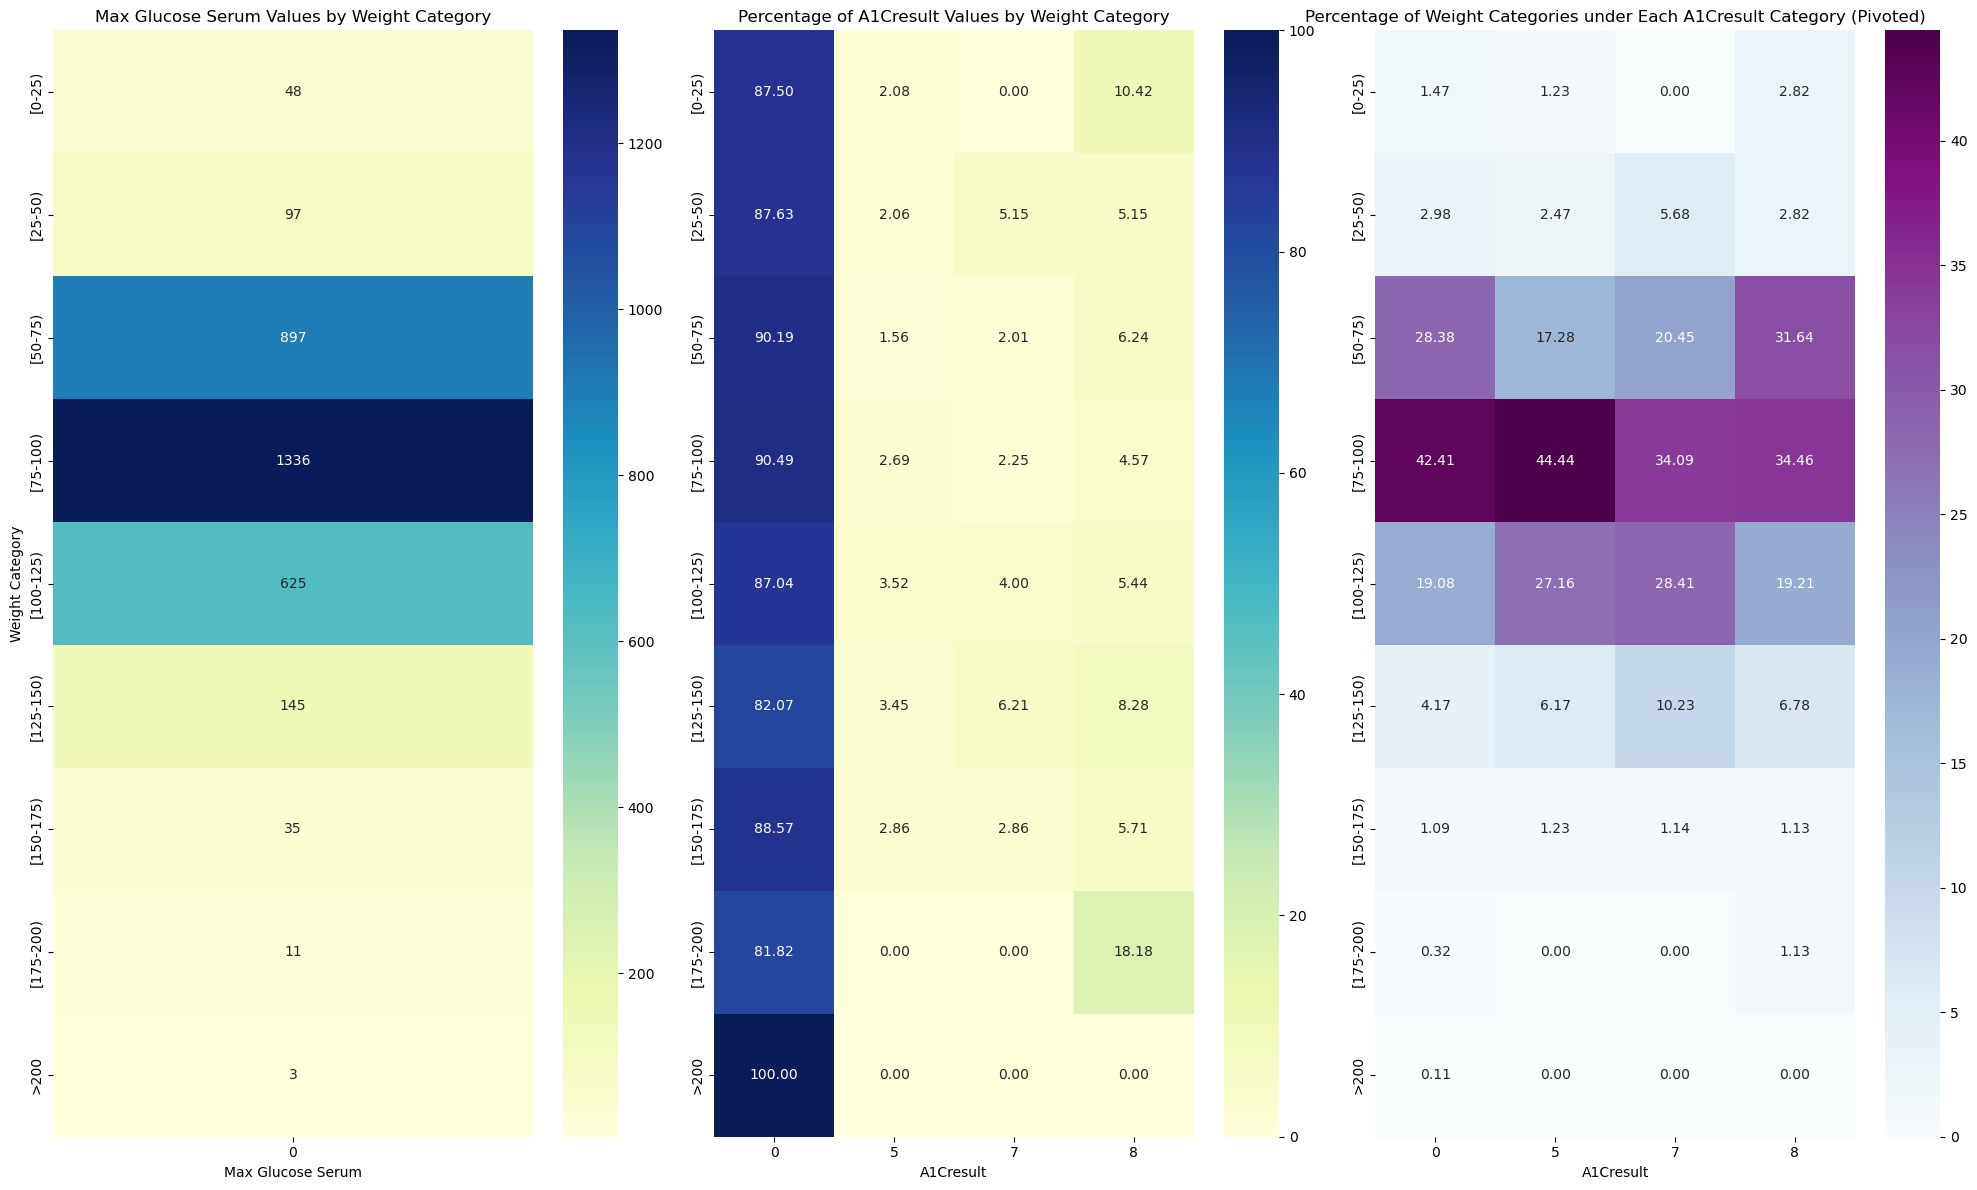

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_with_weight = df[['weight', 'max_glu_serum', 'A1Cresult']]


# --- Data Preparation ---

# Define and order weight categories
weight_order = ['[0-25)', '[25-50)', '[50-75)', '[75-100)', '[100-125)', '[125-150)', '[150-175)', '[175-200)', '>200']
df_with_weight['weight'] = pd.Categorical(df_with_weight['weight'], categories=weight_order, ordered=True)

# --- Data Aggregation ---

# Count occurrences of 'max_glu_serum' and 'A1Cresult' for each weight category
max_glu_serum_counts = df_with_weight.groupby('weight')['max_glu_serum'].value_counts().unstack(fill_value=0)
a1cresult_counts = df_with_weight.groupby('weight')['A1Cresult'].value_counts().unstack(fill_value=0)

# Calculate the percentage of 'A1Cresult' within each weight category
a1cresult_percentages = a1cresult_counts.div(a1cresult_counts.sum(axis=1), axis=0) * 100

# Group by 'A1Cresult' and count occurrences of each 'weight'
weight_counts = df_with_weight.groupby('A1Cresult')['weight'].value_counts().unstack(fill_value=0)

# Calculate the percentage of each 'weight' category within each 'A1Cresult' category
weight_percentages = weight_counts.div(weight_counts.sum(axis=1), axis=0) * 100

# Transpose for the pivoted plot
weight_percentages_transposed = weight_percentages.T

# --- Visualization ---


# Plot all visualizations in a 1x3 subplot grid
fig, axs = plt.subplots(1, 3, figsize=(20, 12))  # Adjust the figure size as needed

# Max Glucose Serum Values by Weight Category
sns.heatmap(max_glu_serum_counts, annot=True, fmt="d", cmap="YlGnBu", ax=axs[0])
axs[0].set_title('Max Glucose Serum Values by Weight Category')
axs[0].set_xlabel('Max Glucose Serum')
axs[0].set_ylabel('Weight Category')

# Percentage of A1Cresult Values by Weight Category
sns.heatmap(a1cresult_percentages, annot=True, fmt=".2f", cmap="YlGnBu", ax=axs[1])
axs[1].set_title('Percentage of A1Cresult Values by Weight Category')
axs[1].set_xlabel('A1Cresult')
axs[1].set_ylabel('')  # Hide y-label for clarity, as it's the same as the first plot

# Percentage of Weight Categories under Each A1Cresult Category (Pivoted)
sns.heatmap(weight_percentages_transposed, annot=True, fmt=".2f", cmap="BuPu", ax=axs[2])
axs[2].set_title('Percentage of Weight Categories under Each A1Cresult Category (Pivoted)')
axs[2].set_xlabel('A1Cresult')
axs[2].set_ylabel('')  # Hide y-label for clarity, as it's consistent with the other plots

plt.tight_layout()
plt.show()






Due to the presence of many missing values in the weight column and the majority of values for Max Glucose Serum and A1Cresult being 'None', it is challenging to determine a correlation between them. However, it is notable that among our sample population with known weight values, the predominant weight category falls between 75 to 100 pounds.

Within each weight category, although the majority of the patients did not undergo the A1Cresult test, for those who did, the proportion of people with a level above 8 is the highest across almost all weight range categories.

Looking at each A1Cresult category, individuals weighing between 75 to 100 kg represent the largest group. For those with A1C results under 5 and 7, the second largest group consists of individuals weighing between 100 to 125 kg. Meanwhile, for those with A1C results under 8, individuals weighing between 50 to 75 kg make up the second largest population.

In [47]:

df.to_csv('/Users/fanfan/Desktop/Exploratory data analysis /exploratory-data-analysis-zefan/df_lastest.csv', index=False)


### Correlation between admission_type_id,discharge_disposition_id,admission_source_id and max_glu_serum and A1Cresult values



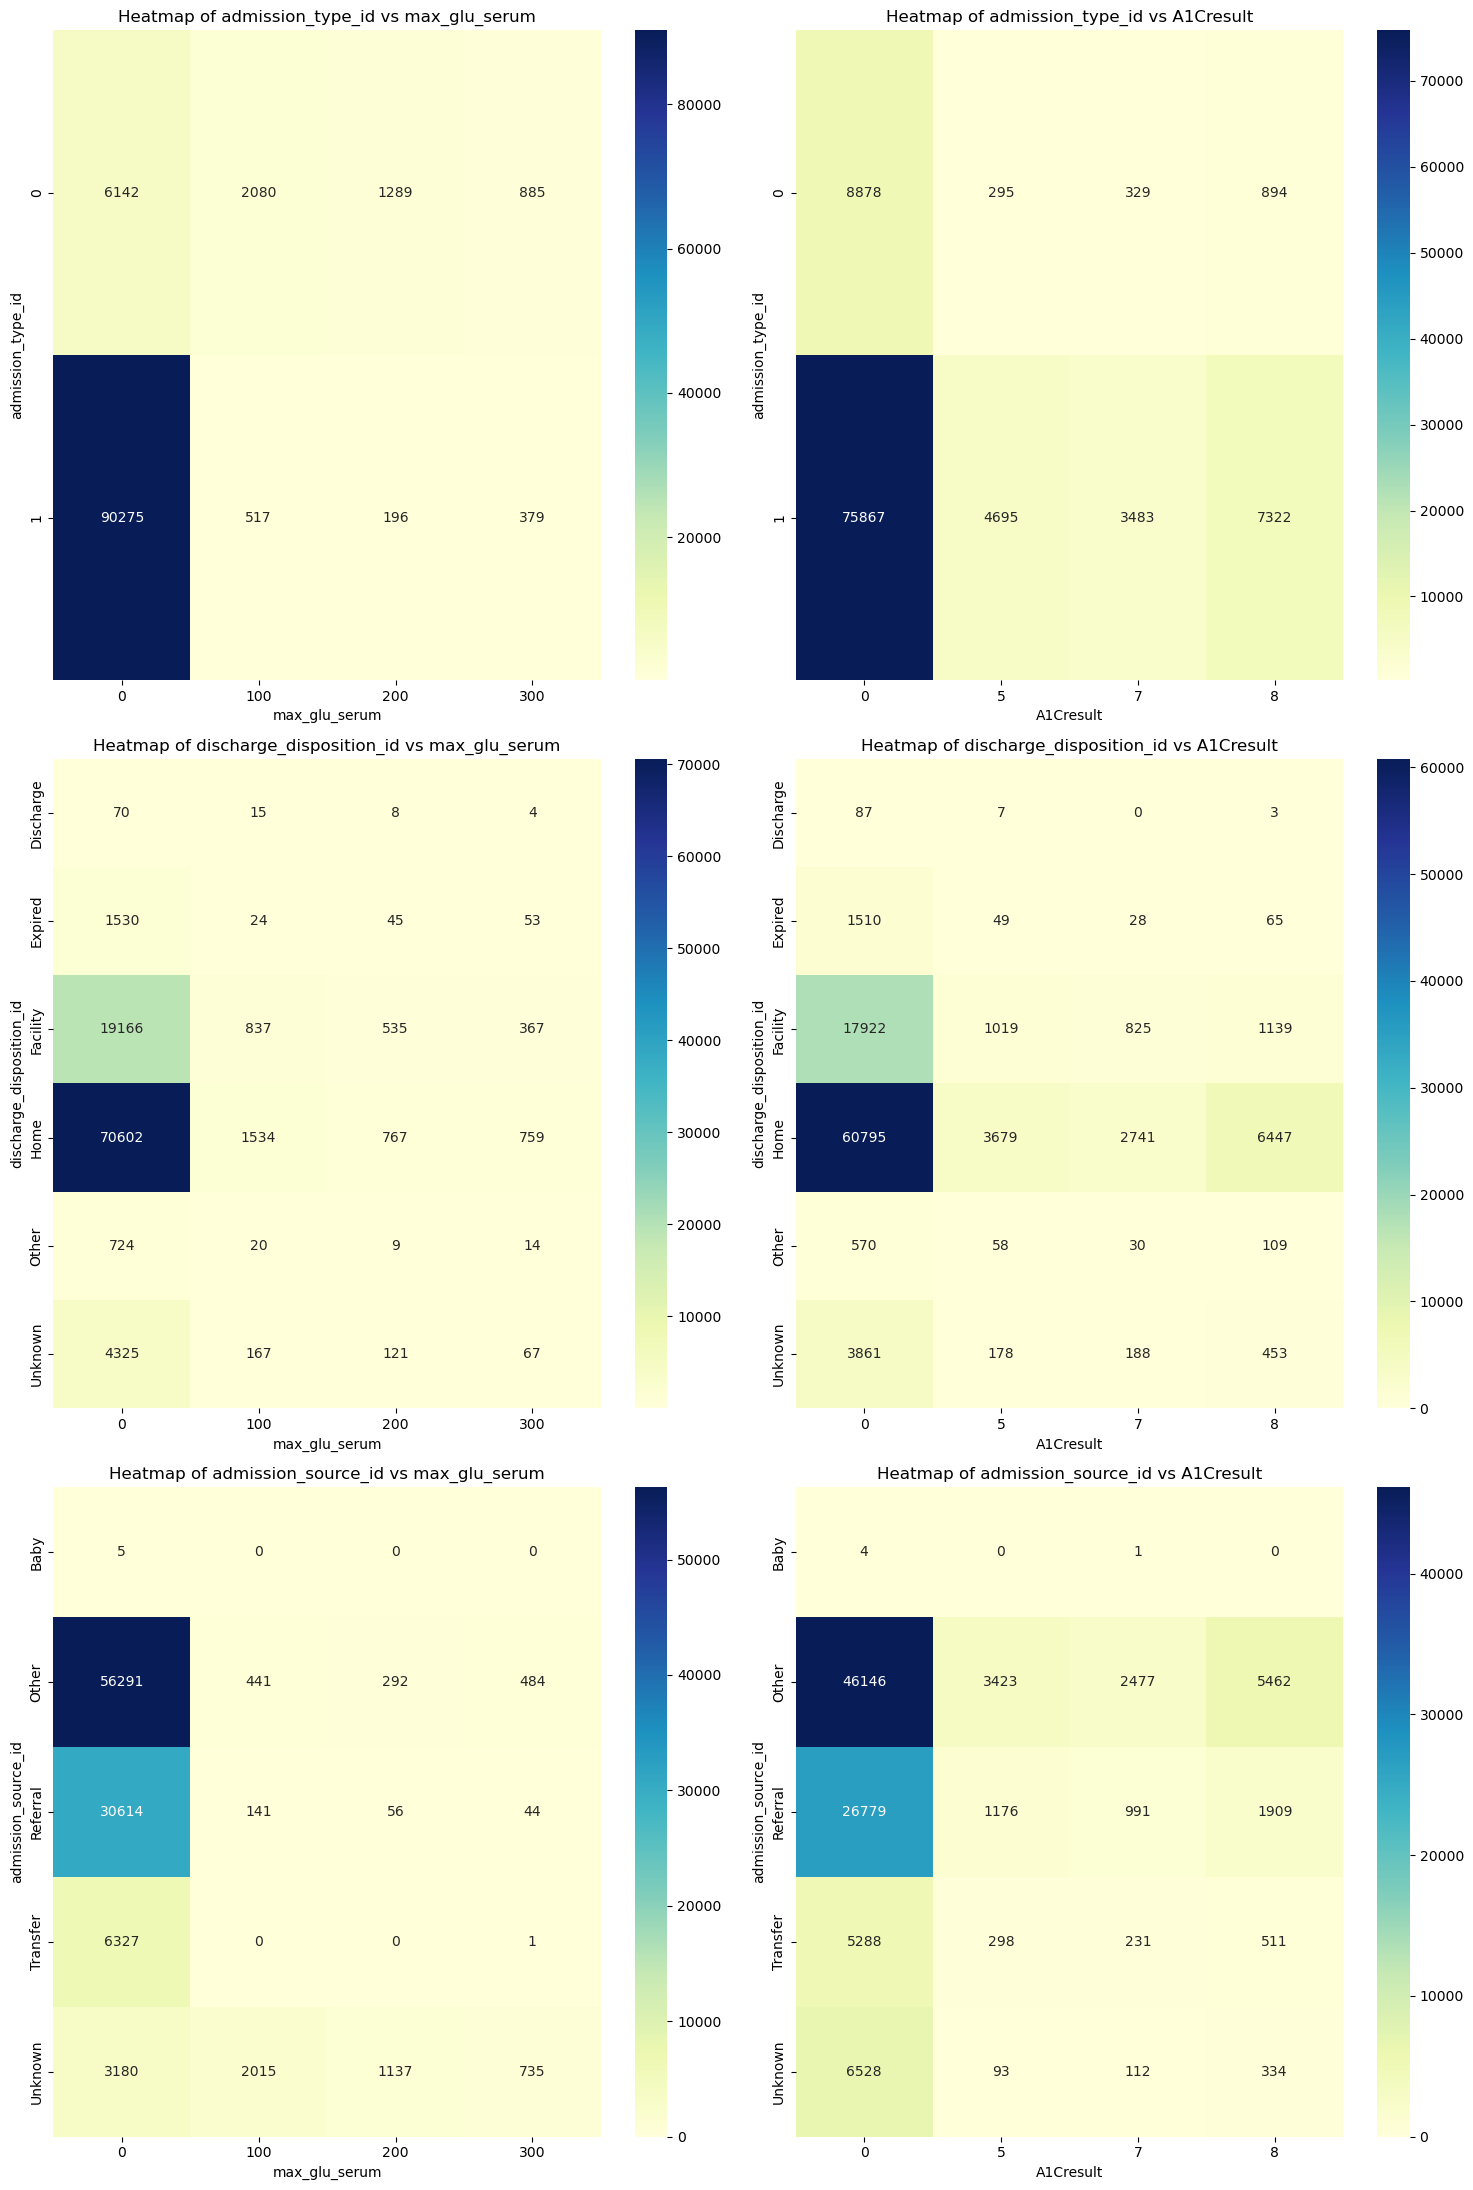

In [48]:
variable_pairs = [
    ('admission_type_id', 'max_glu_serum'),
    ('admission_type_id', 'A1Cresult'),
    ('discharge_disposition_id', 'max_glu_serum'),
    ('discharge_disposition_id', 'A1Cresult'),
    ('admission_source_id', 'max_glu_serum'),
    ('admission_source_id', 'A1Cresult')
]

# Generate heatmaps for each pair
fig, axes = plt.subplots(3, 2, figsize=(15, 22))  # Adjust subplot grid size if necessary
axes = axes.flatten()  # Flatten if using more than one row

for i, (var1, var2) in enumerate(variable_pairs):
    contingency_table = pd.crosstab(df[var1], df[var2])
    sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d", ax=axes[i])
    axes[i].set_title(f'Heatmap of {var1} vs {var2}')
    axes[i].set_xlabel(var2)
    axes[i].set_ylabel(var1)

plt.tight_layout()
plt.show()


Most of the encounters did not involve testing for max_glu_serum and A1Cresult. However, for those who underwent both tests:

Among the different admission types, the largest number of people, totaling 2,597 (2,080 + 517), had a max glucose serum level of 100. The highest number of people with an A1Cresult above 8 was 8,139 (817 + 7,322).
Regarding discharge disposition IDs, the greatest number of people with a max glucose serum level of 100 was 1,534, and they were typically classified under the 'home' type. Similarly, the most common A1Cresult above 8 occurred 6,447 times, also predominantly among those classified under the 'home' type.
Among the admission source IDs, the maximum count of individuals with a max glucose serum level of 100 was 2,015, associated mostly with the 'Unknown' type. The largest group with an A1Cresult above 8 was 5,462, mainly categorized under 'Other'.

In [49]:
csv_file_path = 'for experiment.csv'

# Export the DataFrame to CSV
df.to_csv(csv_file_path, index=False)

In [50]:
import pandas as pd

# Assuming df is your DataFrame, which you have already defined
# If you haven't defined it, you can read your CSV file into df as shown earlier

# Initialize dictionaries to store columns based on their data types
numeric_columns = {}
categorical_columns = {}
datetime_columns = {}

# Iterate through each column in the DataFrame
for column_name, dtype in df.dtypes.items():
    if dtype == 'int64' or dtype == 'float64':
        numeric_columns[column_name] = dtype
    elif dtype == 'object':
        categorical_columns[column_name] = dtype
    elif dtype == 'datetime64':
        datetime_columns[column_name] = dtype

# Print the categorized columns
print("Numeric Columns:")
print(numeric_columns)
print("\nCategorical Columns:")
print(categorical_columns)
print("\nDatetime Columns:")
print(datetime_columns)


Numeric Columns:
{'encounter_id': dtype('int64'), 'patient_nbr': dtype('int64'), 'admission_type_id': dtype('int64'), 'time_in_hospital': dtype('int64'), 'num_lab_procedures': dtype('int64'), 'num_procedures': dtype('int64'), 'num_medications': dtype('int64'), 'number_outpatient': dtype('int64'), 'number_emergency': dtype('int64'), 'number_inpatient': dtype('int64'), 'number_diagnoses': dtype('int64'), 'max_glu_serum': dtype('int64'), 'A1Cresult': dtype('int64'), 'metformin': dtype('int64'), 'repaglinide': dtype('int64'), 'nateglinide': dtype('int64'), 'chlorpropamide': dtype('int64'), 'glimepiride': dtype('int64'), 'acetohexamide': dtype('int64'), 'glipizide': dtype('int64'), 'glyburide': dtype('int64'), 'tolbutamide': dtype('int64'), 'pioglitazone': dtype('int64'), 'rosiglitazone': dtype('int64'), 'acarbose': dtype('int64'), 'miglitol': dtype('int64'), 'troglitazone': dtype('int64'), 'tolazamide': dtype('int64'), 'insulin': dtype('int64'), 'glyburide-metformin': dtype('int64'), 'glip

## Simple Experiment of differenticial privacy

#Try to do a simple test of the differenticial privacy on the 'readmitted'.

In [107]:

import matplotlib.pyplot as plt #matplotlib to graph data
import random #random to implement the coin flip

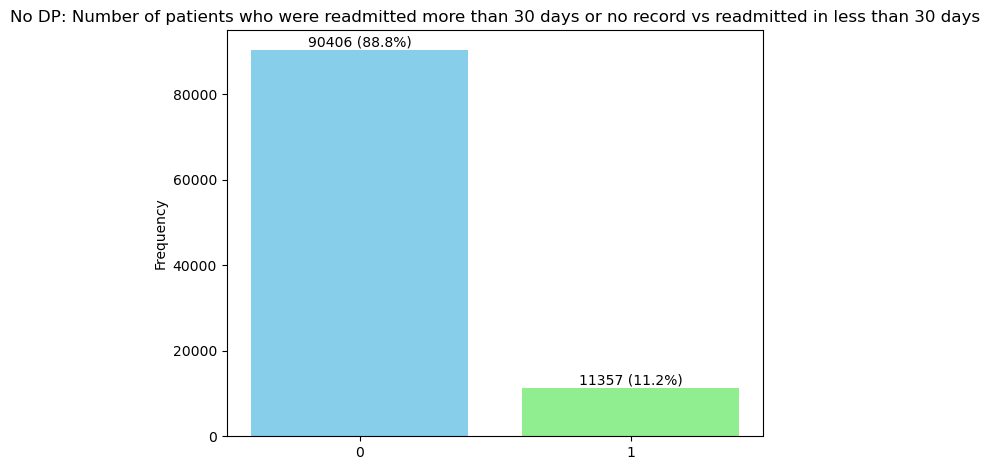

In [108]:

# Plot 'readmitted' distribution
readmitted_counts = df['readmitted'].value_counts()
labels = list(readmitted_counts.index)
values = list(readmitted_counts.values)

plt.bar(range(len(labels)), values, color=['skyblue', 'lightgreen'])
plt.title('No DP: Number of patients who were readmitted more than 30 days or no record vs readmitted in less than 30 days')
plt.ylabel('Frequency')

# Set x-axis tick labels
plt.xticks(range(len(labels)), labels)

# Add count and percentage labels
total = readmitted_counts.sum()
for x, y in zip(range(len(labels)), values):
    percentage = '{:.1f}%'.format(100 * y / total)
    label = f'{y} ({percentage})'
    plt.text(x, y, label, ha='center', va='bottom')

plt.tight_layout()
plt.show()




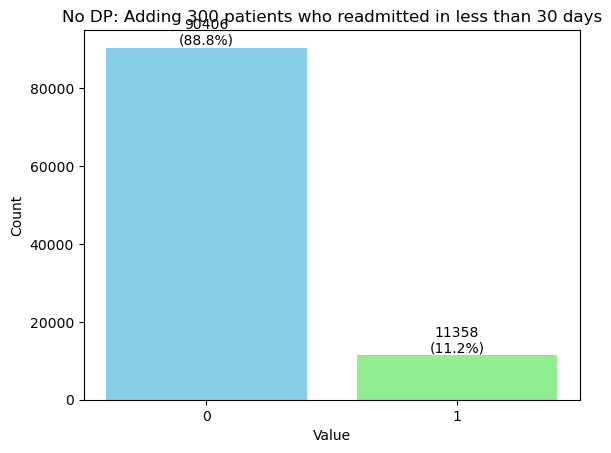

In [109]:


# Get counts of '1' and '0' in the 'readmitted' attribute
count_1 = df['readmitted'].value_counts().get(1, 0)
count_0 = df['readmitted'].value_counts().get(0, 0)

# Manually add 100 to the count of value '1' in the 'readmitted' attribute
count_1 += 1

# Calculate total count
total_count = count_1 + count_0

# Calculate percentage
percentage_0 = (count_0 / total_count) * 100
percentage_1 = (count_1 / total_count) * 100


# Plot the bar chart
plt.bar(['0', '1'], [count_0,count_1,], color=['skyblue', 'lightgreen'])

# Add counts and percentages to the bars
plt.text(1, count_1, f'{count_1}\n({percentage_1:.1f}%)', ha='center', va='bottom')                                              
plt.text(0, count_0, f'{count_0}\n({percentage_0:.1f}%)', ha='center', va='bottom')



# Add title and labels
plt.title("No DP: Adding 300 patients who readmitted in less than 30 days")
plt.xlabel("Value")
plt.ylabel("Count")

# Show the plot
plt.show()




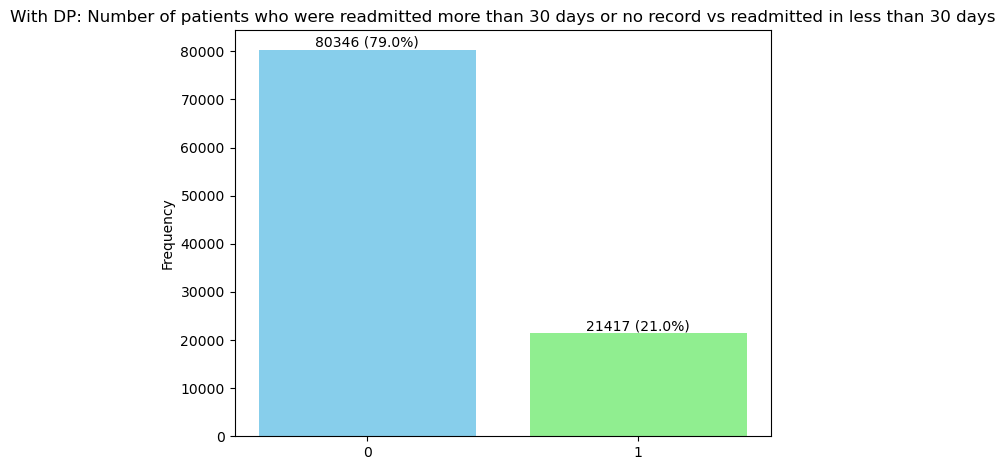

In [110]:
import random

def update_readmitted(row):
    # Flip the first coin
    flip1 = random.choice(['head', 'tail'])
    
    if flip1 == 'head':
        # If head, add the existing value of the 'readmitted' attribute to the new attribute
        return row['readmitted']
    else:
        # If tail, flip the second coin
        flip2 = random.choice(['head', 'tail'])
        if flip2 == 'head':
            # If head, assign the existing value of the 'readmitted' attribute to the new attribute
            return row['readmitted']
        else:
            # If tail, randomly assign 0 or 1 as the value of the new attribute
            return random.randint(0, 1)

# Apply the function to create the new attribute
df['updated_readmitted'] = df.apply(update_readmitted, axis=1)

# Count the frequency of each value in the 'updated_readmitted' attribute
updated_readmitted_counts = df['updated_readmitted'].value_counts()
labels = list(updated_readmitted_counts.index)
values = list(updated_readmitted_counts.values)

# Plot the bar chart
plt.bar(range(len(labels)), values, color=['skyblue', 'lightgreen'])
plt.title('With DP: Number of patients who were readmitted more than 30 days or no record vs readmitted in less than 30 days')
plt.ylabel('Frequency')

# Set x-axis tick labels
plt.xticks(range(len(labels)), labels)

# Add count and percentage labels
total = updated_readmitted_counts.sum()
for x, y in zip(range(len(labels)), values):
    percentage = '{:.1f}%'.format(100 * y / total)
    label = f'{y} ({percentage})'
    plt.text(x, y, label, ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [111]:
new_row = pd.DataFrame({'updated_readmitted': [1]})

# Concatenate the original DataFrame with the new row DataFrame
df = pd.concat([df, new_row], ignore_index=True)
df


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,updated_readmitted
0,2278392.0,8222157.0,Caucasian,Female,[0-10),NaN,0.0,Unknown,Referral,1.0,...,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,0.0,0.0,0.0,0
1,149190.0,55629189.0,Caucasian,Female,[10-20),NaN,1.0,Home,Other,3.0,...,10.0,-20.0,-20.0,-20.0,-20.0,-20.0,1.0,1.0,0.0,0
2,64410.0,86047875.0,AfricanAmerican,Female,[20-30),NaN,1.0,Home,Other,2.0,...,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,0.0,1.0,0.0,0
3,500364.0,82442376.0,Caucasian,Male,[30-40),NaN,1.0,Home,Other,2.0,...,10.0,-20.0,-20.0,-20.0,-20.0,-20.0,1.0,1.0,0.0,0
4,16680.0,42519267.0,Caucasian,Male,[40-50),NaN,1.0,Home,Other,1.0,...,0.0,-20.0,-20.0,-20.0,-20.0,-20.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101759,443847782.0,74694222.0,AfricanAmerican,Female,[80-90),NaN,1.0,Facility,Transfer,5.0,...,0.0,-20.0,-20.0,-20.0,-20.0,-20.0,0.0,1.0,0.0,0
101760,443854148.0,41088789.0,Caucasian,Male,[70-80),NaN,1.0,Home,Other,1.0,...,-10.0,-20.0,-20.0,-20.0,-20.0,-20.0,1.0,1.0,0.0,0
101761,443857166.0,31693671.0,Caucasian,Female,[80-90),NaN,1.0,Facility,Other,10.0,...,10.0,-20.0,-20.0,-20.0,-20.0,-20.0,1.0,1.0,0.0,0
101762,443867222.0,175429310.0,Caucasian,Male,[70-80),NaN,1.0,Home,Other,6.0,...,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,0.0,0.0,0.0,0


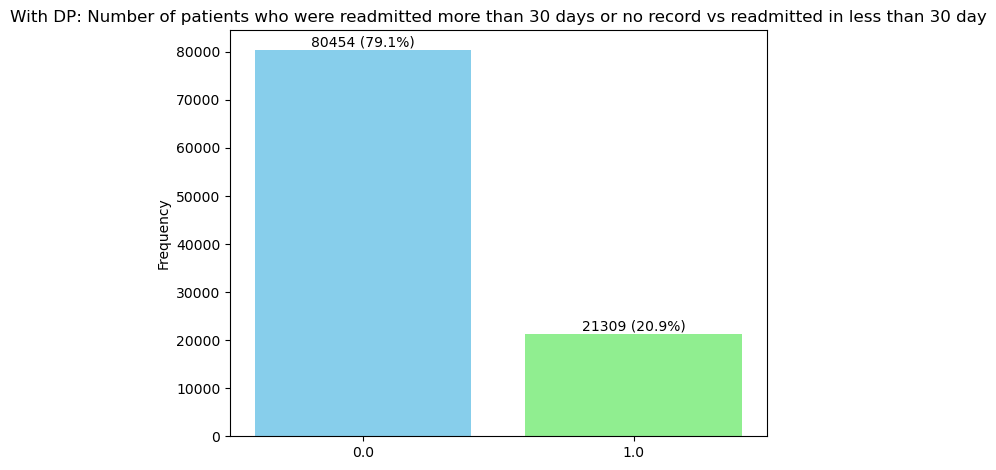

In [112]:

# Define a function to flip a coin and update the value accordingly
def update_readmitted(row):
    # Flip the first coin
    flip1 = random.choice(['head', 'tail'])
    
    if flip1 == 'head':
        # If head, add the existing value of the 'readmitted' attribute to the new attribute
        return row['readmitted']
    else:
        # If tail, flip the second coin
        flip2 = random.choice(['head', 'tail'])
        if flip2 == 'head':
            # If head, assign the existing value of the 'readmitted' attribute to the new attribute
            return row['readmitted']
        else:
            # If tail, randomly assign 0 or 1 as the value of the new attribute
            return random.randint(0, 1)

# Apply the function to create the new attribute
df['updated_readmitted'] = df.apply(update_readmitted, axis=1)

# Count the frequency of each value in the 'updated_readmitted' attribute
updated_readmitted_counts = df['updated_readmitted'].value_counts()
labels = list(updated_readmitted_counts.index)
values = list(updated_readmitted_counts.values)

# Plot the bar chart
plt.bar(range(len(labels)), values, color=['skyblue', 'lightgreen'])
plt.title('With DP: Number of patients who were readmitted more than 30 days or no record vs readmitted in less than 30 day')
plt.ylabel('Frequency')

# Set x-axis tick labels
plt.xticks(range(len(labels)), labels)

# Add count and percentage labels
total = updated_readmitted_counts.sum()
for x, y in zip(range(len(labels)), values):
    percentage = '{:.1f}%'.format(100 * y / total)
    label = f'{y} ({percentage})'
    plt.text(x, y, label, ha='center', va='bottom')

plt.tight_layout()
plt.show()



#Try to do a simple test of the differenticial privacy on the 'diag_1', 'diag_2', 'diag_3'.

In [113]:
distinct_diag_1 = df['diag_1'].unique()
distinct_diag_2 = df['diag_2'].unique()
distinct_diag_3 = df['diag_3'].unique()

print("Distinct values in 'diag_1':", distinct_diag_1)
print("Distinct values in 'diag_2':", distinct_diag_2)
print("Distinct values in 'diag_3':", distinct_diag_3)


Distinct values in 'diag_1': ['other' 'pregnancy' 'neoplasms' 'circulatory' 'respiratory' 'injury'
 'musculoskeletal' 'digestive' 'genitourinary' 'diabetes' nan]
Distinct values in 'diag_2': ['other' 'diabetes' 'neoplasms' 'circulatory' 'respiratory' 'injury'
 'musculoskeletal' 'genitourinary' 'digestive' 'pregnancy' nan]
Distinct values in 'diag_3': ['diabetes' 'other' 'circulatory' 'respiratory' 'injury' 'neoplasms'
 'genitourinary' 'musculoskeletal' 'digestive' 'pregnancy' nan]


### Analysis 1: 
Make sure to add some explanation of what you are doing in your code. This will help you and whoever will read this a lot in following your steps.

### Analysis 2: 

In [4]:
# ...

### Analysis n:

In [5]:
# ...